In [26]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.inspection import permutation_importance

import pickle

## Preprocessed Dataset

In [2]:
# load the preprocessed dataset which includes the manually engineered features
dataset_path = 'C:/Users/kavis/Desktop/Junior-Senior Project (UOS)/AI Implementation/Presentation Complexity/Data Preprocessing and Manual Feature Engineering (Phase 1)/cleaned_presentation_complexity_dataset_with_features.csv'

pcd_df = pd.read_csv(dataset_path)
pcd_df.head()

Video Name  \
0    Plant Parts and Functions for Kids   
1  Adjectives for Kids | Homeschool Pop   
2               Roman Numerals For Kids   
3            Benjamin Franklin for Kids   
4                  Paul Revere for Kids   

                                     Video URL  Complexity Level  \
0  https://www.youtube.com/watch?v=18amLZ9vfG8                 0   
1  https://www.youtube.com/watch?v=4jxXnHSbicY                 0   
2  https://www.youtube.com/watch?v=NrnXsKYpLJM                 0   
3  https://www.youtube.com/watch?v=5LcMXnZfFFY                 0   
4  https://www.youtube.com/watch?v=dmwcfaythY4                 0   

               Cleaned Video Name  Frame Rate (fps)  \
0   PlantPartsandFunctionsforKids              25.0   
1  AdjectivesforKidsHomeschoolPop              25.0   
2            RomanNumeralsForKids              25.0   
3         BenjaminFranklinforKids              25.0   
4               PaulRevereforKids              25.0   

   Scene Transition Rate (Per Min)  Average Scene Duration (in Mins)  \
0                         2.596279                          0.371885   
1                         1.874561                          0.502078   
2                         1.475894                          0.609800   
3                         7.554297                          0.124588   
4                         6.286014                          0.149725   

   Average Motion Intensity  Average Texture Contrast  \
0                  1.801748               5111.683237   
1                  0.569372               3943.115691   
2                  1.104255               3996.529243   
3                  1.867790               4844.473094   
4                  2.819806               6004.130270   

   Average Texture Homogeneity  Dominant Color Standard Deviation (R)  \
0                     0.379146                              82.994624   
1                     0.319201                              72.648775   
2                     0.362325                              80.947498   
3                     0.412323                              72.428249   
4                     0.404992                              67.448256   

   Dominant Color Standard Deviation (G)  \
0                              68.282270   
1                              70.043557   
2                              78.241961   
3                              78.067785   
4                              74.333054   

   Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  Compression Ratio  \
0                              67.973004         0.181855           0.396224   
1                              83.526724         0.161331           0.278195   
2                              75.806626         0.176696           0.217683   
3                              77.097537         0.232962           0.099683   
4                              67.625711         0.218057           0.112131   

   Average PSNR (dB)  Average SSIM  Average Color Standard Deviation (R)  \
0          46.203267      0.930128                             58.307155   
1          55.694422      0.971648                             47.858784   
2          49.813713      0.938447                             65.295601   
3          37.454033      0.908600                             43.882747   
4          53.370351      0.918199                             37.902162   

   Average Color Standard Deviation (G)  Average Color Standard Deviation (B)  
0                             44.548661                             52.432824  
1                             49.947640                             72.322853  
2                             64.685164                             72.467431  
3                             42.760733                             52.778252  
4                             41.067300                             40.336226

## Data Splitting and Feature Normalization (Additional Data Preprocessing Step)

In [3]:
# put input features in X
X = pcd_df.iloc[:, 4:]
X

Frame Rate (fps)  Scene Transition Rate (Per Min)  \
0            25.00000                         2.596279   
1            25.00000                         1.874561   
2            25.00000                         1.475894   
3            25.00000                         7.554297   
4            25.00000                         6.286014   
..                ...                              ...   
166          30.00000                         0.464852   
167          30.00000                         0.442532   
168          30.00000                         0.474121   
169          30.00000                         0.568675   
170          29.97003                         0.759978   

     Average Scene Duration (in Mins)  Average Motion Intensity  \
0                            0.371885                  1.801748   
1                            0.502078                  0.569372   
2                            0.609800                  1.104255   
3                            0.124588                  1.867790   
4                            0.149725                  2.819806   
..                                ...                       ...   
166                          1.792685                  0.288752   
167                          1.807778                  0.362684   
168                          1.687333                  0.343207   
169                          1.406778                  0.222980   
170                          1.169625                  3.776419   

     Average Texture Contrast  Average Texture Homogeneity  \
0                 5111.683237                     0.379146   
1                 3943.115691                     0.319201   
2                 3996.529243                     0.362325   
3                 4844.473094                     0.412323   
4                 6004.130270                     0.404992   
..                        ...                          ...   
166               3347.984951                     0.504033   
167               3699.863799                     0.484276   
168               2632.182147                     0.563689   
169               3097.400054                     0.540458   
170               5396.817163                     0.150312   

     Dominant Color Standard Deviation (R)  \
0                                82.994624   
1                                72.648775   
2                                80.947498   
3                                72.428249   
4                                67.448256   
..                                     ...   
166                              14.179595   
167                              15.449361   
168                              16.640451   
169                              17.544101   
170                              52.585299   

     Dominant Color Standard Deviation (G)  \
0                                68.282270   
1                                70.043557   
2                                78.241961   
3                                78.067785   
4                                74.333054   
..                                     ...   
166                              17.663254   
167                              19.174761   
168                              20.467835   
169                              21.802770   
170                              40.383054   

     Dominant Color Standard Deviation (B)  Bit Rate (Mbps)  \
0                                67.973004         0.181855   
1                                83.526724         0.161331   
2                                75.806626         0.176696   
3                                77.097537         0.232962   
4                                67.625711         0.218057   
..                                     ...              ...   
166                              21.425349         0.196151   
167                              23.284993         0.198828   
168                              24.626911         0.177840   
169                   

In [4]:
# put output variable in y
y = pcd_df['Complexity Level']
y

0      0
1      0
2      0
3      0
4      0
      ..
166    1
167    1
168    1
169    1
170    1
Name: Complexity Level, Length: 171, dtype: int64

In [5]:
# split X and y into training and test sets using 70/30 split ratio in a stratified way
# stratified splitting ensures the class ratio in the training and test sets are similar which is important for imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42, stratify=y.values)

In [6]:
# ensure the class ratio in the training and test sets are almost equal
# check if the number of samples in training set is sufficient
print(f'Training Set Class =\n{pd.DataFrame(y_train).value_counts()}')
print(f'Test Set Class =\n{pd.DataFrame(y_test).value_counts()}')

Training Set Class =
0    65
1    54
dtype: int64
Test Set Class =
0    29
1    23
dtype: int64


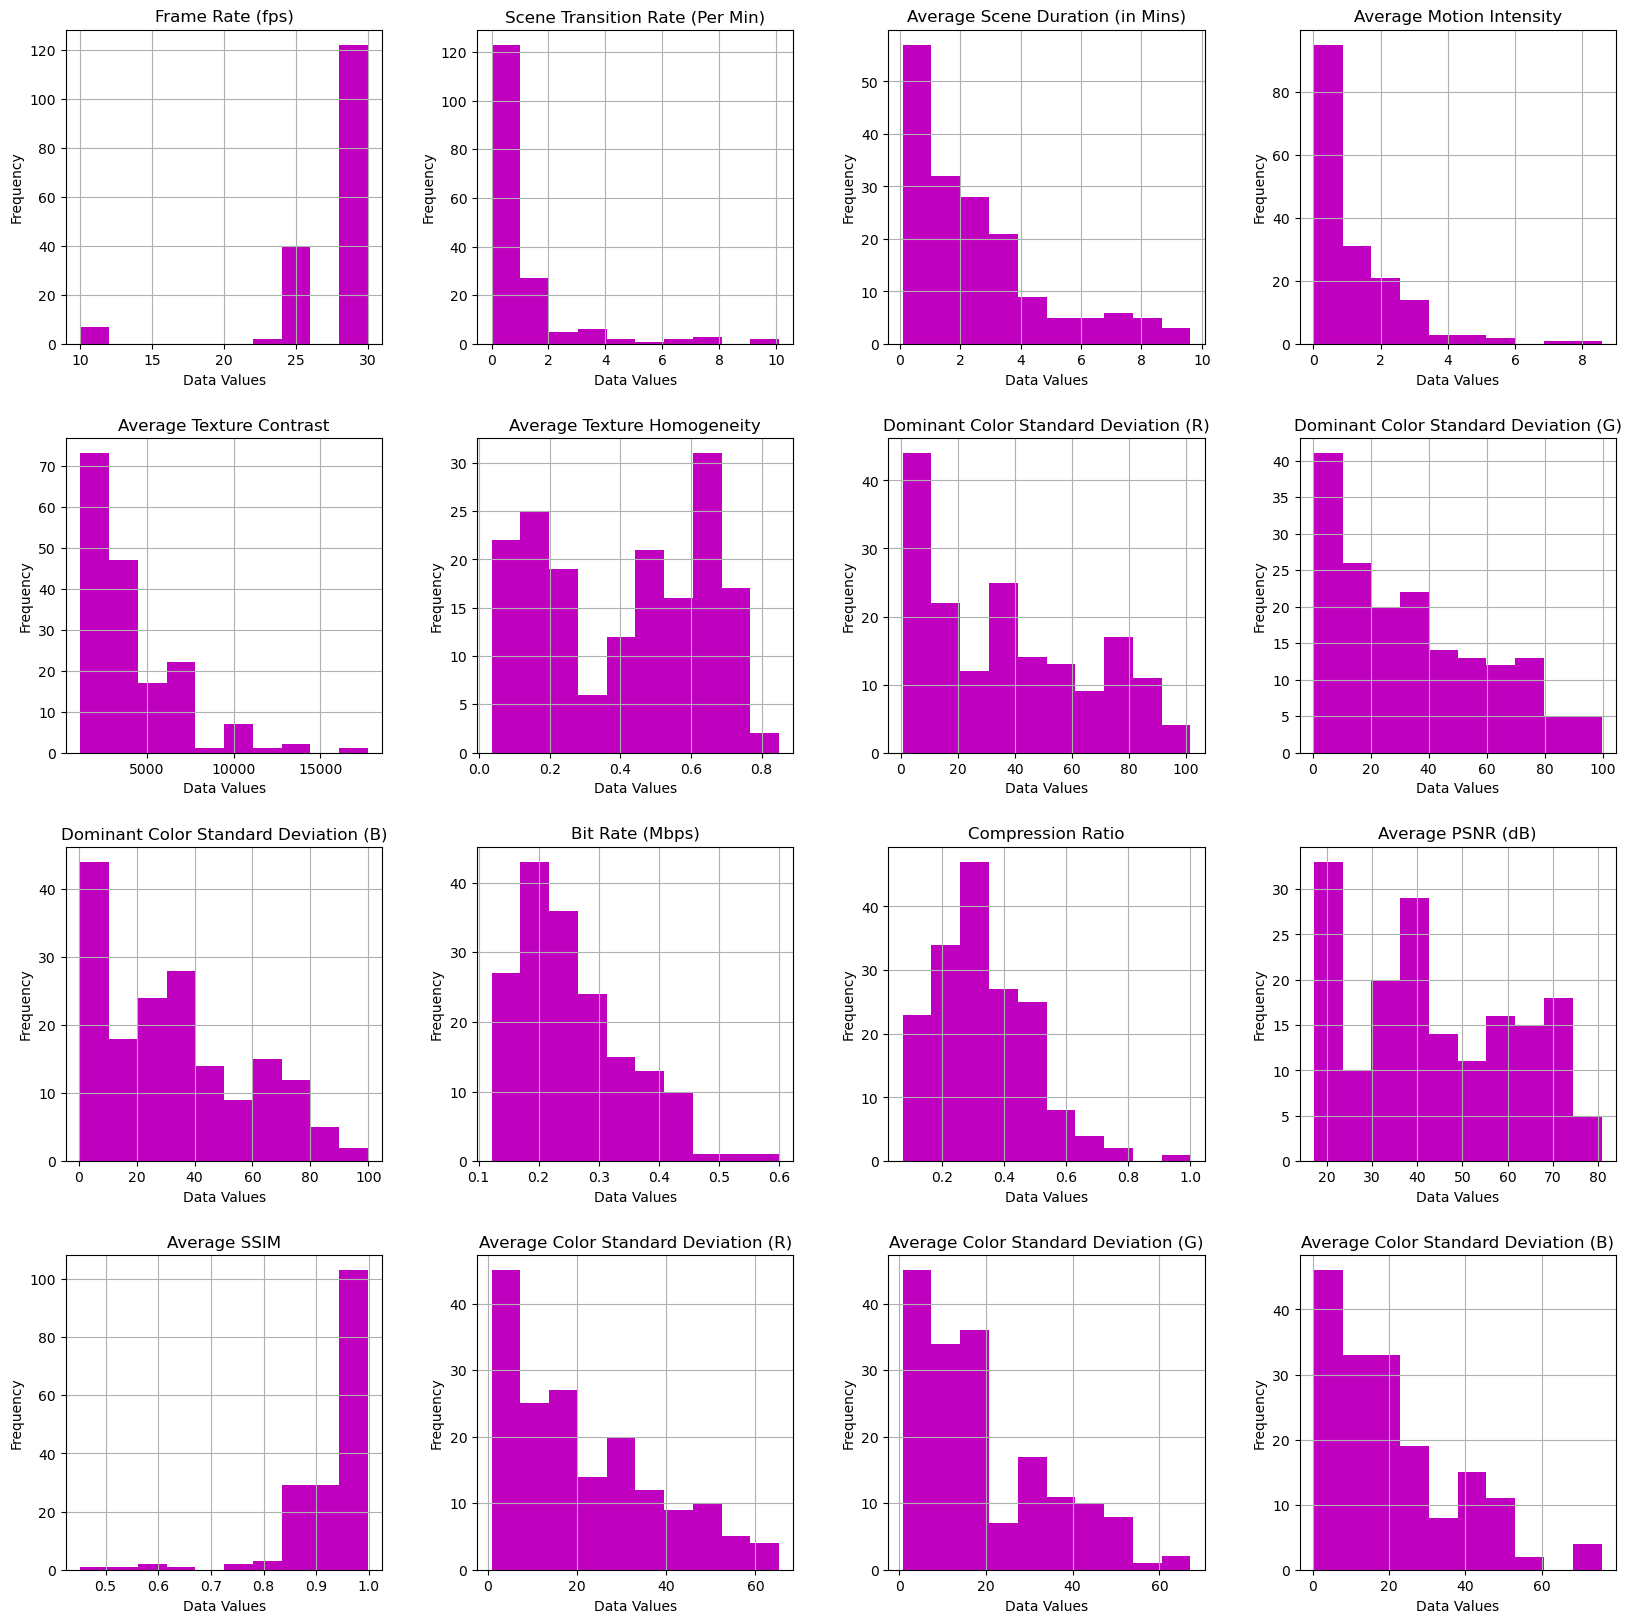

In [7]:
# plot a histogram for each input feature to visualize their distribution
plt.rcParams.update({'figure.figsize':(20,20), 'figure.dpi':100})

fig, axis = plt.subplots(4, 4)
histogram = X.hist(ax=axis, color='m')

for subplot in histogram.flatten():
    subplot.set_xlabel('Data Values')
    subplot.set_ylabel('Frequency')

plt.show()

In [7]:
# normalize the input features to a similar scale using min max scaling method for unbiased performance in distance-based ML algorithms
# normalization is usually opted when features have skewed distribution instead of a normal distribution
# normalization is done after data splitting, where the scaler learns the transformation strategy using the training set and applies it to both the training and test sets
# this ensures that there is no influence of the test set on the train set which could otherwise introduce bias
scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [8]:
# save the min max scaler
scaler_filename = 'scaler_1.pkl'

with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

## Model Selection

In [27]:
# perform stratified cross validation to validate the model with default parameters using training set
def cross_validation(model, X_train, y_train, cv_value):
    cv_accuracy = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv_value)
    cv_precision = cross_val_score(model, X_train, y_train, scoring='precision', cv=cv_value)
    cv_recall = cross_val_score(model, X_train, y_train, scoring='recall', cv=cv_value)
    cv_f1 = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv_value)
    cv_roc_auc = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv_value)

    print(f"Mean Accuracy = {round(cv_accuracy.mean(), 3)}")
    print(f"Mean Precision = {round(cv_precision.mean(), 3)}")
    print(f"Mean Recall = {round(cv_recall.mean(), 3)}")
    print(f"Mean F1-Score = {round(cv_f1.mean(), 3)}")
    print(f"Mean Area Under ROC Curve = {round(cv_roc_auc.mean(), 3)}")

In [18]:
# plot normalized confusion matrix using the actual and predicted values
def plot_norm_confusion_matrix(algorithm_name, y_actual, y_pred):
    plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
    
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_actual, y_pred, normalize='true', values_format='.2f', display_labels=['simple', 'hard'], cmap=plt.cm.Purples)
    plt.title(f'Normalized Confusion Matrix for {algorithm_name}', pad=10)
    plt.show()

In [11]:
# calculate the area under the ROC curve and plot the ROC curve using the actual and predicted values
def plot_roc_auc_curve(algorithm_name, model, X, y_actual):
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    y_pred_prob = model.predict_proba(X)[:, 1]
    
    roc_auc = round(metrics.roc_auc_score(y_actual, y_pred_prob), 3) 
    print(f"Area Under ROC curve = {roc_auc}")
    
    fpr, tpr, thresholds = metrics.roc_curve(y_actual, y_pred_prob, pos_label=1)
    plt.plot(fpr, tpr, label=f'Area Under ROC Curve = {roc_auc}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve for {algorithm_name}', pad=10)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## 1. Random Forest

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [12]:
# build a random forest classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_rf_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf_untuned', RandomForestClassifier(random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_rf_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.949
Mean Precision = 0.945
Mean Recall = 0.944
Mean F1-Score = 0.944
Mean Area Under ROC Curve = 0.996


### Model Hyperparameter Tuning using GridSearchCV

In [13]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_rf = Pipeline([
    ('scaler', MinMaxScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_params = [{
    'rf__n_estimators': [50, 100, 200, 300, 400, 500],
    'rf__max_depth': [None, 5, 10, 15, 20],
    'rf__min_samples_split': [2, 6, 10, 14],
    'rf__min_samples_leaf': [1, 3, 5],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__max_leaf_nodes': [None, 2, 4, 6]
}]

rf_tuned = GridSearchCV(pipe_rf, rf_params, cv=5, scoring='f1', verbose=10)
rf_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits
[CV 1/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 3/5; 1/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_

[CV 4/5; 5/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 5/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 5/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 6/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 6/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 6/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.9s
[CV 4/5; 10/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   1.2s
[CV 5/5; 10/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 10/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   1.4s
[CV 1/5; 11/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 15/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 15/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 20/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 20/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 20/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 20/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 24/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 24/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 24/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 25/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 25/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 25/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 29/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 29/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 29/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 30/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.3s
[CV 3/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 34/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 34/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 39/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 39/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 39/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 39/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 44/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 44/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 44/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 44/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 44/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 44/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 48/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 48/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 48/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 49/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 49/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 49/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 53/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 53/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 53/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 54/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 58/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 58/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 58/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 58/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 63/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 63/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 63/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 63/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 63/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 63/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 68/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 68/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 68/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 68/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 68/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 68/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 72/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 72/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 72/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 73/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 73/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 73/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_sampl

[CV 3/5; 77/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 77/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 77/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 77/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 77/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 78/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 82/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 82/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 82/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 82/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 82/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 82/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 87/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 87/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 87/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 87/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 87/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 87/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 92/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 92/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 92/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 92/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 92/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5; 92/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 97/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 97/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 97/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 97/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 97/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 98/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__

[CV 2/5; 102/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 3/5; 102/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 102/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.783 total time=   0.6s
[CV 4/5; 102/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 102/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.815 total time=   0.6s
[CV 5/5; 102/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 107/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.846 total time=   0.7s
[CV 2/5; 107/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 107/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 3/5; 107/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 107/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.783 total time=   0.9s
[CV 4/5; 107/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 111/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.3s
[CV 1/5; 112/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 112/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.846 total time=   0.7s
[CV 2/5; 112/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 112/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 112/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 116/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 1/5; 117/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 117/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 117/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 117/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 117/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 122/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 122/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 122/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 122/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 122/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 122/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 126/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 127/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 127/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 127/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 127/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 127/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 4/5; 131/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 131/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 131/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 132/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 132/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 132/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 136/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.783 total time=   0.5s
[CV 4/5; 136/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 136/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 136/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 136/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.6s
[CV 1/5; 137/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 2/5; 141/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 141/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 141/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 141/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 141/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.815 total time=   0.3s
[CV 5/5; 141/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 146/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 146/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 146/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 146/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 146/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 146/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 150/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 151/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 151/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 151/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 151/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 151/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 4/5; 155/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.917 total time=   0.5s
[CV 5/5; 155/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 155/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 156/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 156/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 156/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 160/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 160/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 160/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 160/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 160/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 161/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 165/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 165/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 165/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 165/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 165/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.3s
[CV 5/5; 165/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 170/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 170/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 170/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 170/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 170/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 170/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 174/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 175/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 175/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 175/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 175/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 175/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 4/5; 179/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 179/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 179/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 180/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 180/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 180/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 184/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 184/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 184/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 184/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 184/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 185/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 189/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 189/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 189/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.5s
[CV 4/5; 189/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 189/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.3s
[CV 5/5; 189/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 194/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 194/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 194/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 194/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 194/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 194/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 5/5; 198/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 199/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 199/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 199/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 199/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 199/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=

[CV 4/5; 203/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 203/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 203/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 204/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 204/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 204/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 208/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 208/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 208/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 208/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 208/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 209/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 2/5; 213/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 213/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 213/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 213/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 213/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.4s
[CV 5/5; 213/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 218/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 218/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 218/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 218/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 218/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 218/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 222/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 223/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 223/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5; 223/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 223/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 223/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=

[CV 4/5; 227/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 227/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 227/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 228/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 228/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 228/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 232/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 232/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 232/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 232/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 232/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 233/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 237/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 237/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 237/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 237/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 237/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 237/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 242/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 242/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 242/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 242/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 242/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 242/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 246/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 247/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 247/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 247/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 247/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 247/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=

[CV 4/5; 251/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 251/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 251/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 252/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 252/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 252/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 256/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 256/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 256/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 256/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 256/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 257/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 261/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 261/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 261/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 261/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 261/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 261/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 2/5; 266/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 266/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 266/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 266/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 266/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 266/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 271/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 271/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 3/5; 271/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 271/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 271/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 271/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5

[CV 1/5; 276/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 276/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 2/5; 276/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 276/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 3/5; 276/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.870 total time=   0.7s
[CV 4/5; 276/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 280/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 281/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 1/5; 281/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=1.000 total time=   0.7s
[CV 2/5; 281/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 281/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 281/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 4/5; 285/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 285/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 5/5; 285/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 1/5; 286/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 286/4320] END rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 286/4320] START rf__max_depth=None, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samp

[CV 3/5; 290/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 290/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 290/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 290/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 5/5; 290/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 291/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 2/5; 295/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 295/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 3/5; 295/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 4/5; 295/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 295/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 295/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__

[CV 5/5; 299/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 300/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 300/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   1.2s
[CV 2/5; 300/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 2/5; 300/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.952 total time=   1.0s
[CV 3/5; 300/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 3/5; 304/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.8s
[CV 4/5; 304/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 304/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 304/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 304/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 305/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 1/5; 309/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 309/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 309/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 309/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 309/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 309/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 4/5; 313/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 313/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 313/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 314/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 314/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 314/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf

[CV 2/5; 318/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.952 total time=   0.8s
[CV 3/5; 318/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 318/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.9s
[CV 4/5; 318/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 318/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 318/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 5/5; 322/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 323/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 1/5; 323/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 323/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 323/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.952 total time=   0.7s
[CV 3/5; 323/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 3/5; 327/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 327/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 327/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 327/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 5/5; 327/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 1/5; 328/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 1/5; 332/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 332/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 332/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 332/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 332/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 332/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 4/5; 336/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   1.1s
[CV 5/5; 336/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 336/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 337/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 337/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 337/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None

[CV 2/5; 341/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.9s
[CV 3/5; 341/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 341/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 341/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 341/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 341/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 5/5; 345/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 1/5; 346/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 346/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.7s
[CV 2/5; 346/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 346/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 346/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 4/5; 350/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 350/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 350/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 1/5; 351/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 351/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 351/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 3/5; 355/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 355/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 355/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 355/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 355/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.889 total time=   0.0s
[CV 1/5; 356/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None,

[CV 1/5; 360/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 360/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 360/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 360/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 360/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.870 total time=   0.9s
[CV 4/5; 360/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=

[CV 5/5; 364/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 365/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 365/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.846 total time=   0.5s
[CV 2/5; 365/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 365/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 3/5; 365/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 4/5; 369/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.815 total time=   0.4s
[CV 5/5; 369/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 369/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.4s
[CV 1/5; 370/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 370/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.846 total time=   0.4s
[CV 2/5; 370/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 374/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 374/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 374/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5; 374/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 374/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 1/5; 375/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 3/5; 379/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 379/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 379/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 379/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 379/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 380/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 384/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 3/5; 384/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 384/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.783 total time=   0.9s
[CV 4/5; 384/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 384/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.7s
[CV 5/5; 384/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 389/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.846 total time=   0.5s
[CV 2/5; 389/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 389/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 3/5; 389/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 389/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 389/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 393/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 1/5; 394/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 394/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.846 total time=   0.5s
[CV 2/5; 394/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 394/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 394/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 398/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 1/5; 399/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 399/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 399/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 399/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 399/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 404/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 404/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 404/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 404/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 404/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 404/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 408/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 409/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 409/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 409/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 409/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 409/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf

[CV 4/5; 413/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 413/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 413/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 414/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 414/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   1.0s
[CV 2/5; 414/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 418/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 418/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 418/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 418/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 418/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 419/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 423/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 423/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 423/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 423/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 423/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 423/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 428/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 428/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 428/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 428/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 428/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.2s
[CV 4/5; 428/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 432/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 1/5; 433/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 433/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 433/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 433/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 433/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 4/5; 437/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.5s
[CV 5/5; 437/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 437/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 438/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 438/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 438/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 442/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 442/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 442/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 442/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 442/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 443/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 447/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 447/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 447/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.5s
[CV 4/5; 447/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 447/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.4s
[CV 5/5; 447/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 452/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 452/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 452/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 452/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 452/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 452/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 456/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 457/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 457/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 457/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 457/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 457/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 4/5; 461/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 461/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 461/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 1/5; 462/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 462/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 462/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 466/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 466/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 466/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 466/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 466/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 467/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 471/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 471/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 471/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.5s
[CV 4/5; 471/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 471/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.5s
[CV 5/5; 471/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 476/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 476/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 476/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 476/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 476/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 476/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 480/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 481/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 481/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 481/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 481/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 481/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf

[CV 4/5; 485/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 485/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 485/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 486/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 486/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 486/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 3/5; 490/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 490/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 490/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 490/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 490/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 491/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 495/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 495/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 495/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 495/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 495/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 495/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 500/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 500/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 500/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 500/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 500/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 500/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 504/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 505/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 505/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 505/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 505/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 505/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 4/5; 509/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 509/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 509/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 510/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 510/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 510/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 514/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 514/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 514/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 514/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 514/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 515/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 519/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 519/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 519/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 519/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 519/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 519/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 524/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.5s
[CV 2/5; 524/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 524/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.3s
[CV 3/5; 524/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 524/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.5s
[CV 4/5; 524/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 528/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 529/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 529/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 529/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 529/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 529/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 4/5; 533/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   1.1s
[CV 5/5; 533/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 533/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 1/5; 534/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 534/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 534/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 538/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.6s
[CV 4/5; 538/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 538/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 538/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 538/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 539/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 543/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 543/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 543/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 543/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 543/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 543/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 548/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 548/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 548/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 548/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 548/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 548/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 552/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 553/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 553/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 553/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 553/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 553/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 4/5; 557/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 557/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 557/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 558/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 558/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 558/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 562/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 562/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 562/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 562/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 562/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 563/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 567/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 567/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 567/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 567/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 567/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 567/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 572/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 572/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 572/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 572/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 572/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 572/4320] START rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 576/4320] END rf__max_depth=None, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 577/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 577/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 577/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 577/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 577/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 581/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   1.1s
[CV 4/5; 581/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 581/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.9s
[CV 5/5; 581/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 581/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.6s
[CV 1/5; 582/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 586/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 586/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 586/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 586/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 586/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 4/5; 586/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 5/5; 590/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 591/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 591/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 591/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 591/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 591/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 3/5; 595/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 595/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 595/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 595/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 595/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 1/5; 596/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 600/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 600/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 600/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   2.3s
[CV 3/5; 600/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 600/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   1.9s
[CV 4/5; 600/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 604/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 604/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 604/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 605/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 605/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 605/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 2/5; 609/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 609/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 609/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.3s
[CV 4/5; 609/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 609/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 609/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 614/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 614/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 614/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 614/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 614/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 614/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 618/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 618/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 618/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.6s
[CV 1/5; 619/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 619/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 619/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=No

[CV 2/5; 623/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 623/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 623/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 4/5; 623/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 623/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 623/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 5/5; 627/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 1/5; 628/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 628/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.6s
[CV 2/5; 628/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 628/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.900 total time=   0.6s
[CV 3/5; 628/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 3/5; 632/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 632/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 632/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 632/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 632/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.2s
[CV 1/5; 633/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 3/5; 637/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 637/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 637/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 637/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 637/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 638/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None,

[CV 1/5; 642/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 642/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 2/5; 642/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 3/5; 642/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 642/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   0.9s
[CV 4/5; 642/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 4/5; 646/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 646/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 646/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 647/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 1/5; 647/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 647/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=

[CV 3/5; 651/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 651/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 651/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.692 total time=   0.2s
[CV 5/5; 651/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 5/5; 651/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.800 total time=   0.3s
[CV 1/5; 652/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 656/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.783 total time=   0.0s
[CV 4/5; 656/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 656/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.692 total time=   0.0s
[CV 5/5; 656/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 656/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 657/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 3/5; 661/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 4/5; 661/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 661/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.692 total time=   0.0s
[CV 5/5; 661/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 661/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5; 662/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 666/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 3/5; 666/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 666/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.783 total time=   0.6s
[CV 4/5; 666/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 666/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.692 total time=   0.7s
[CV 5/5; 666/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 1/5; 671/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 2/5; 671/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 671/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 3/5; 671/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 671/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.783 total time=   0.4s
[CV 4/5; 671/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 675/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.800 total time=   0.4s
[CV 1/5; 676/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 676/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.815 total time=   0.5s
[CV 2/5; 676/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 676/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 676/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 5/5; 680/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 681/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 681/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5; 681/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 681/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 681/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 686/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 686/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 686/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 686/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 686/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 686/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 690/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.800 total time=   0.8s
[CV 1/5; 691/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 691/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 691/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 691/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 691/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_

[CV 4/5; 695/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.692 total time=   0.4s
[CV 5/5; 695/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 695/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.800 total time=   0.4s
[CV 1/5; 696/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 696/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.6s
[CV 2/5; 696/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 3/5; 700/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 700/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 700/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.692 total time=   0.3s
[CV 5/5; 700/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 700/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.800 total time=   0.3s
[CV 1/5; 701/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 2/5; 705/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 705/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 705/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 705/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 705/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.692 total time=   0.2s
[CV 5/5; 705/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_l

[CV 1/5; 710/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/5; 710/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 710/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 3/5; 710/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 710/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.0s
[CV 4/5; 710/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 5/5; 714/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.800 total time=   0.6s
[CV 1/5; 715/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 715/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 715/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 715/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 715/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_

[CV 4/5; 719/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.692 total time=   0.4s
[CV 5/5; 719/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 719/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.800 total time=   0.5s
[CV 1/5; 720/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 720/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.8s
[CV 2/5; 720/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samp

[CV 3/5; 724/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 724/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 724/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 724/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 724/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 725/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 729/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 729/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 729/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 729/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 729/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 729/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 734/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 734/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 734/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 734/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 734/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 734/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 738/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 739/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 739/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 739/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 739/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 739/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_

[CV 4/5; 743/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 743/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 743/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 1/5; 744/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 744/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 744/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 3/5; 748/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 4/5; 748/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 748/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 748/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 748/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 749/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 753/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 753/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 753/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 753/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 753/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 753/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 1/5; 758/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 758/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 758/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 758/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 758/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 758/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 5/5; 762/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 763/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 763/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 763/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 763/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 763/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_

[CV 4/5; 767/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 767/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 767/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 1/5; 768/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 768/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 768/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 3/5; 772/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 772/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 772/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 772/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 772/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 773/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 777/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 777/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 777/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 777/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 777/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 777/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 782/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 782/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 782/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 782/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 782/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 782/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 3/5; 787/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 787/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 787/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 787/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 787/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 788/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_l

[CV 2/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 792/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 4/5; 792/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 792/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 792/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samp

[CV 1/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.7s
[CV 2/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 797/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 797/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 801/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.952 total time=   0.2s
[CV 1/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 802/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 802/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 802/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 5/5; 806/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 807/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 807/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 807/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 812/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 2/5; 812/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 812/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 812/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 812/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 812/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 816/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 817/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 817/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 817/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 817/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 817/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 4/5; 821/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 821/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 821/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 822/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 822/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 822/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 826/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 826/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 826/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 827/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 831/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 831/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 831/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 831/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 836/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 836/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 836/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 836/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 836/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 836/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 840/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 841/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 841/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 841/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 841/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 841/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf

[CV 4/5; 845/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 845/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 845/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 846/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 846/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 846/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 3/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 4/5; 850/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 850/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 850/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 1/5; 851/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_l

[CV 2/5; 855/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 855/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 855/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 855/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 1/5; 860/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 860/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 860/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 860/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 860/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 860/4320] START rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samp

[CV 5/5; 864/4320] END rf__max_depth=None, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 865/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 865/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 865/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 865/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 865/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf

[CV 4/5; 869/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 869/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 869/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 870/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 870/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.1s
[CV 2/5; 870/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 3/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 874/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 874/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 874/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 875/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 2/5; 879/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 879/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 879/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 879/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 1/5; 884/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 884/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 884/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 884/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 884/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 884/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 5/5; 888/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 889/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 889/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 889/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 889/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 889/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf

[CV 4/5; 893/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.8s
[CV 5/5; 893/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 893/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 894/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 894/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 894/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 3/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 898/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 898/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 898/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 899/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 2/5; 903/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 903/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 903/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 903/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 1/5; 908/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 908/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 908/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 908/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 908/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 908/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 5/5; 912/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   1.2s
[CV 1/5; 913/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 913/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 913/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 913/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 913/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf

[CV 4/5; 917/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   1.3s
[CV 5/5; 917/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 917/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.9s
[CV 1/5; 918/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 918/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 918/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 3/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 922/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 922/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 922/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 923/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_l

[CV 2/5; 927/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.5s
[CV 3/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 927/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.4s
[CV 4/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 927/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 927/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 1/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 932/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 932/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 5/5; 936/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 937/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 937/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 937/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 4/5; 941/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 941/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 941/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 942/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 942/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 942/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 3/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 946/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 946/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 946/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 947/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_sam

[CV 2/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 951/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 951/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__mi

[CV 1/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 956/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 956/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__mi

[CV 5/5; 960/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.5s
[CV 1/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 961/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 961/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 961/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sample

[CV 4/5; 965/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 965/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 965/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 966/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 966/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 966/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sam

[CV 3/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 970/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 970/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 970/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 1/5; 971/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sam

[CV 2/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 975/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 975/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__mi

[CV 1/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 980/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 980/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__mi

[CV 5/5; 984/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 985/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 985/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 985/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_sample

[CV 4/5; 989/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 5/5; 989/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 989/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.4s
[CV 1/5; 990/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 990/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.5s
[CV 2/5; 990/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_sam

[CV 3/5; 994/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 994/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 994/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 994/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 994/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 995/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_sam

[CV 2/5; 999/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 999/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 999/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 999/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 999/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 999/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__mi

[CV 1/5; 1004/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 1004/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1004/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 1004/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1004/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 1004/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 5/5; 1008/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.5s
[CV 1/5; 1009/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1009/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1009/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1009/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1009/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_

[CV 4/5; 1013/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.4s
[CV 5/5; 1013/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1013/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1014/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1014/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1014/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1018/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1018/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1018/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 1018/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1018/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1019/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1023/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1023/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1023/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5; 1023/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1023/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.1s
[CV 5/5; 1023/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 1/5; 1028/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1028/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1028/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1028/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1028/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1028/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 5/5; 1032/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1033/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1033/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1033/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1033/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1033/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_

[CV 4/5; 1037/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1037/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1037/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1038/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1038/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.5s
[CV 2/5; 1038/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1042/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1042/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1042/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 1042/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1042/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1043/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1047/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1047/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1047/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1047/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1047/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.1s
[CV 5/5; 1047/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1052/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/5; 1052/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1052/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 1052/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1052/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1052/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 5/5; 1056/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1057/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1057/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1057/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1057/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1057/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_

[CV 4/5; 1061/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1061/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1061/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 1062/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1062/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1062/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1066/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 1066/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1066/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 1066/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1066/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1067/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1071/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1071/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1071/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1071/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1071/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1071/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 1/5; 1076/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 1076/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1076/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1076/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1076/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1076/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 5/5; 1080/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.5s
[CV 1/5; 1081/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1081/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1081/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1081/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1081/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_

[CV 4/5; 1085/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1085/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1085/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 1/5; 1086/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1086/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 1086/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1090/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1090/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1090/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 1090/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1090/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 1091/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1095/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1095/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1095/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1095/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1095/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1095/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 2/5; 1100/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 1100/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1100/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1100/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 1100/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 1100/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 3/5; 1105/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 1105/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 1105/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1105/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1105/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 1106/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_sa

[CV 2/5; 1110/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 1110/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 1110/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.7s
[CV 4/5; 1110/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1110/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.9s
[CV 5/5; 1110/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 1/5; 1115/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=1.000 total time=   0.4s
[CV 2/5; 1115/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 1115/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 1115/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1115/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.870 total time=   0.4s
[CV 4/5; 1115/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1119/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 1/5; 1120/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 1120/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 1120/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1120/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 1120/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 4/5; 1124/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 1124/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 5/5; 1124/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 1/5; 1125/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 1125/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1125/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 4/5; 1129/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1129/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 1129/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.842 total time=   0.0s
[CV 1/5; 1130/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 1130/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1130/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_

[CV 3/5; 1134/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.5s
[CV 4/5; 1134/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 1134/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 1134/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 1134/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 1135/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1139/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 1139/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 1139/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 1139/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 1139/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1139/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 1/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 1144/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 1144/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 1144/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.6s
[CV 4/5; 1144/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1149/4320] END rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1149/4320] START rf__max_depth=5, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1154/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 1154/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1158/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1159/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1159/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1159/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1163/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1163/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1163/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 1/5; 1164/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1164/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1164/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1168/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 1168/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1168/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1169/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1173/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1173/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1178/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1178/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1182/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1183/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1183/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1183/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1187/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 1187/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1187/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1188/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1188/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1188/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1192/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 1192/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1192/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1193/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.1s
[CV 3/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1197/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1197/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1202/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1202/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1206/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1207/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1207/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1207/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples

[CV 4/5; 1211/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1211/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1211/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 1/5; 1212/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1212/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 1212/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 3/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.6s
[CV 4/5; 1216/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   1.3s
[CV 5/5; 1216/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1216/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 1/5; 1217/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.5s
[CV 4/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1221/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.5s
[CV 5/5; 1221/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1226/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1226/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1230/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 1/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 1231/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 1231/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1231/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_s

[CV 4/5; 1235/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 1235/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 1235/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   0.9s
[CV 1/5; 1236/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 1236/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.846 total time=   1.1s
[CV 2/5; 1236/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 3/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1240/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.815 total time=   0.7s
[CV 5/5; 1240/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 1240/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.6s
[CV 1/5; 1241/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 2/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 1245/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 1245/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 2/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 1250/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.786 total time=   0.1s
[CV 5/5; 1250/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1255/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.870 total time=   0.1s
[CV 4/5; 1255/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 1255/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 1255/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 1255/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 1256/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_sa

[CV 2/5; 1260/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 3/5; 1260/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 3/5; 1260/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.783 total time=   0.8s
[CV 4/5; 1260/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 1260/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.815 total time=   0.7s
[CV 5/5; 1260/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 1/5; 1265/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.846 total time=   0.7s
[CV 2/5; 1265/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 1265/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 3/5; 1265/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 1265/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 1265/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 5/5; 1269/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 1/5; 1270/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 1270/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.846 total time=   0.4s
[CV 2/5; 1270/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 1270/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 1270/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 5/5; 1274/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 1/5; 1275/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 1275/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 1275/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 1275/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 1275/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 4/5; 1279/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 1279/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 1279/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 1280/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 1280/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 1280/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_

[CV 3/5; 1284/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.783 total time=   1.1s
[CV 4/5; 1284/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 1284/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.815 total time=   0.9s
[CV 5/5; 1284/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 1284/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 1/5; 1285/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1289/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 3/5; 1289/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 1289/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.783 total time=   0.6s
[CV 4/5; 1289/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 1289/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 1289/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 1/5; 1294/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.846 total time=   0.4s
[CV 2/5; 1294/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 1294/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 1294/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 1294/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1294/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 1/5; 1299/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1299/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 1299/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1299/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 1299/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 1299/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 1/5; 1304/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1304/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 1304/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1304/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 1304/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1304/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1308/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1309/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 1309/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1309/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 1309/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1309/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 4/5; 1313/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.917 total time=   0.5s
[CV 5/5; 1313/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 1313/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1314/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 1314/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1314/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 3/5; 1318/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 1318/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 1318/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 1318/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 1318/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1319/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 2/5; 1323/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1323/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 1323/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1323/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 1323/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 1323/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 1/5; 1328/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1328/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 1328/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1328/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 1328/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1328/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1332/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   1.0s
[CV 1/5; 1333/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 1333/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1333/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 1333/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1333/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 4/5; 1337/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1337/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 1337/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1338/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 1338/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1338/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 3/5; 1342/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1342/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 1342/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 1342/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 1342/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1343/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 2/5; 1347/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1347/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 1347/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1347/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 1347/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1347/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 1/5; 1352/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 1352/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 1352/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1352/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 1352/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1352/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1356/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1357/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 1357/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1357/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 1357/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1357/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 4/5; 1361/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 1361/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 1361/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 1362/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 1362/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 1362/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 3/5; 1366/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 1366/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 1366/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.5s
[CV 5/5; 1366/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 1366/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.6s
[CV 1/5; 1367/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 2/5; 1371/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1371/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 1371/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 4/5; 1371/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 1371/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1371/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1376/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1376/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 1376/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 1376/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 1376/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 1376/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1381/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1381/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 3/5; 1381/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 1381/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 1381/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1381/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 1/5; 1386/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1386/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 2/5; 1386/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 1386/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 1386/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.870 total time=   0.8s
[CV 4/5; 1386/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 5/5; 1390/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.9s
[CV 1/5; 1391/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 1/5; 1391/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=1.000 total time=   2.0s
[CV 2/5; 1391/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 1391/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   1.6s
[CV 3/5; 1391/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 4/5; 1395/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 1395/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 5/5; 1395/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 1/5; 1396/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 1396/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.8s
[CV 2/5; 1396/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1400/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1400/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 1400/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 1400/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 1400/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 1401/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 3/5; 1405/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 1405/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 1405/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1405/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 1405/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 1406/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1410/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 1410/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 1410/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.870 total time=   0.7s
[CV 4/5; 1410/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 1410/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 1410/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 1/5; 1415/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 1415/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 1415/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 3/5; 1415/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 1415/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.870 total time=   0.8s
[CV 4/5; 1415/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 5/5; 1419/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 1/5; 1420/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 1420/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.6s
[CV 2/5; 1420/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 1420/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 3/5; 1420/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 4/5; 1424/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 1424/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 1424/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.2s
[CV 1/5; 1425/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 1425/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=1.000 total time=   0.4s
[CV 2/5; 1425/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1429/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 1429/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 4/5; 1429/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1429/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 1429/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.842 total time=   0.0s
[CV 1/5; 1430/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1434/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   1.0s
[CV 3/5; 1434/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 3/5; 1434/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.870 total time=   0.9s
[CV 4/5; 1434/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 1434/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   1.0s
[CV 5/5; 1434/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1439/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=1.000 total time=   0.6s
[CV 2/5; 1439/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 2/5; 1439/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   1.1s
[CV 3/5; 1439/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 1439/4320] END rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 1439/4320] START rf__max_depth=5, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 5/5; 1443/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.952 total time=   0.4s
[CV 1/5; 1444/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 1/5; 1444/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.6s
[CV 2/5; 1444/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 1444/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.952 total time=   0.6s
[CV 3/5; 1444/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 1448/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.2s
[CV 5/5; 1448/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 5/5; 1448/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 1449/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 1449/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 1449/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 1453/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.917 total time=   0.2s
[CV 5/5; 1453/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 1453/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 1454/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 1454/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1454/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_s

[CV 3/5; 1458/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   0.9s
[CV 4/5; 1458/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 1458/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 1458/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 1458/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.952 total time=   0.9s
[CV 1/5; 1459/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 2/5; 1463/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 3/5; 1463/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 1463/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.818 total time=   0.9s
[CV 4/5; 1463/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 1463/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.9s
[CV 5/5; 1463/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 1/5; 1468/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 1468/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 1468/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 1468/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 1468/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 1468/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 5/5; 1472/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 1473/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 1/5; 1473/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1473/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 1473/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1473/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 1/5; 1478/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1478/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1478/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1478/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1478/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1478/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 5/5; 1482/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 1483/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1483/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1483/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1483/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1483/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sa

[CV 4/5; 1487/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 1487/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1487/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 1488/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1488/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1488/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 3/5; 1492/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 1492/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1492/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 1492/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1492/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 1/5; 1493/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 2/5; 1497/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1497/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1497/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 1497/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1497/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1497/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 1/5; 1502/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1502/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1502/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.2s
[CV 3/5; 1502/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1502/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.2s
[CV 4/5; 1502/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 5/5; 1506/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.9s
[CV 1/5; 1507/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1507/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1507/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1507/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1507/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sa

[CV 4/5; 1511/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 1511/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1511/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.909 total time=   0.8s
[CV 1/5; 1512/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1512/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 1512/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=None, rf__mi

[CV 3/5; 1516/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1516/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1516/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.692 total time=   0.4s
[CV 5/5; 1516/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1516/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.800 total time=   0.4s
[CV 1/5; 1517/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1521/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 1521/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1521/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 1521/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1521/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.692 total time=   0.3s
[CV 5/5; 1521/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__m

[CV 1/5; 1526/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 1526/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1526/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 1526/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1526/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 1526/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 5/5; 1530/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.800 total time=   0.7s
[CV 1/5; 1531/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1531/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 1531/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1531/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 1531/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__

[CV 4/5; 1535/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.692 total time=   0.6s
[CV 5/5; 1535/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1535/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.800 total time=   0.6s
[CV 1/5; 1536/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1536/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   1.1s
[CV 2/5; 1536/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, 

[CV 3/5; 1540/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1540/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1540/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.692 total time=   0.7s
[CV 5/5; 1540/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1540/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.800 total time=   0.4s
[CV 1/5; 1541/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1545/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 1545/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1545/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 1545/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1545/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.692 total time=   0.2s
[CV 5/5; 1545/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__m

[CV 1/5; 1550/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 1550/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1550/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 1550/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1550/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 1550/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 5/5; 1554/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.800 total time=   1.0s
[CV 1/5; 1555/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1555/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.815 total time=   0.1s
[CV 2/5; 1555/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1555/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.2s
[CV 3/5; 1555/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__

[CV 4/5; 1559/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.692 total time=   0.7s
[CV 5/5; 1559/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1559/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.800 total time=   0.6s
[CV 1/5; 1560/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1560/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.7s
[CV 2/5; 1560/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, 

[CV 3/5; 1564/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1564/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1564/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.692 total time=   0.5s
[CV 5/5; 1564/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1564/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.800 total time=   0.5s
[CV 1/5; 1565/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1569/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 1569/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1569/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 1569/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1569/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.692 total time=   0.5s
[CV 5/5; 1569/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__m

[CV 1/5; 1574/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 1574/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1574/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 1574/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1574/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 1574/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 5/5; 1578/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.800 total time=   0.8s
[CV 1/5; 1579/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1579/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 1579/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1579/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 1579/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__

[CV 4/5; 1583/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.692 total time=   0.7s
[CV 5/5; 1583/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1583/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=400;, score=0.800 total time=   0.8s
[CV 1/5; 1584/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1584/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.9s
[CV 2/5; 1584/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, 

[CV 3/5; 1588/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.7s
[CV 4/5; 1588/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1588/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 1588/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1588/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.6s
[CV 1/5; 1589/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1593/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 1593/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1593/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.4s
[CV 4/5; 1593/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1593/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 1593/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__m

[CV 1/5; 1598/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 1598/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 2/5; 1598/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1598/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1598/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1598/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 5/5; 1602/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 1603/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 1/5; 1603/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1603/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 2/5; 1603/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1603/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__

[CV 4/5; 1607/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.9s
[CV 5/5; 1607/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400
[CV 5/5; 1607/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=400;, score=0.909 total time=   0.8s
[CV 1/5; 1608/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 1/5; 1608/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 1608/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, 

[CV 3/5; 1612/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.818 total time=   0.6s
[CV 4/5; 1612/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 4/5; 1612/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 1612/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300
[CV 5/5; 1612/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 1/5; 1613/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1617/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1617/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 1617/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.818 total time=   0.5s
[CV 4/5; 1617/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 4/5; 1617/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.5s
[CV 5/5; 1617/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1622/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1622/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 1622/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1622/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 1622/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.917 total time=   0.1s
[CV 5/5; 1622/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 3/5; 1627/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 1627/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 1627/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1627/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 1627/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 1628/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__m

[CV 2/5; 1632/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 3/5; 1632/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 1632/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.9s
[CV 4/5; 1632/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 1632/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   1.0s
[CV 5/5; 1632/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, 

[CV 1/5; 1637/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 2/5; 1637/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 1637/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 3/5; 1637/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 1637/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   1.0s
[CV 4/5; 1637/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 5/5; 1641/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 1/5; 1642/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 1642/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 1642/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 1642/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 1642/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 4/5; 1646/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 1646/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 1646/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 1647/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 1647/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 1647/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 3/5; 1651/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 1651/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 1651/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 1651/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 1651/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 1652/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1656/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   1.0s
[CV 3/5; 1656/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 1656/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   1.1s
[CV 4/5; 1656/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 1656/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 1656/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, 

[CV 1/5; 1661/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.7s
[CV 2/5; 1661/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 1661/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 3/5; 1661/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 1661/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.7s
[CV 4/5; 1661/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 5/5; 1665/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.952 total time=   0.3s
[CV 1/5; 1666/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 1666/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.5s
[CV 2/5; 1666/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 1666/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 1666/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 4/5; 1670/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.917 total time=   0.1s
[CV 5/5; 1670/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 1670/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 1671/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 1671/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.4s
[CV 2/5; 1671/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 3/5; 1675/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 1675/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 1675/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 1675/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 1675/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 1676/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__m

[CV 2/5; 1680/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 1680/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 1680/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 4/5; 1680/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 1680/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   1.0s
[CV 5/5; 1680/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, 

[CV 1/5; 1685/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.7s
[CV 2/5; 1685/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 1685/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 3/5; 1685/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 1685/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 4/5; 1685/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1689/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 1/5; 1690/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 1690/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.7s
[CV 2/5; 1690/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 1690/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 1690/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__m

[CV 5/5; 1694/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 1695/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 1695/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1695/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 1695/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1695/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 1/5; 1700/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1700/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1700/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1700/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1700/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1700/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 5/5; 1704/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 1705/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1705/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1705/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1705/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1705/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_

[CV 4/5; 1709/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 1709/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1709/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 1710/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1710/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1710/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 3/5; 1714/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 1714/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1714/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 1714/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1714/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 1715/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__m

[CV 2/5; 1719/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1719/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1719/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 1719/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1719/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1719/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 1/5; 1724/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1724/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1724/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1724/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1724/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1724/4320] START rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, 

[CV 5/5; 1728/4320] END rf__max_depth=5, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 1729/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1729/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1729/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1729/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1729/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samp

[CV 4/5; 1733/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1733/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1733/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1734/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1734/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1734/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 1738/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 1738/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1738/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 1738/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1738/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1739/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 1743/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1743/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1743/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 1743/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1743/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1743/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 1748/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1748/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1748/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1748/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1748/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1748/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1752/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 1752/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 1752/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1753/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1753/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1753/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 1757/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 1757/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 1757/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1757/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1757/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1758/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 1762/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.3s
[CV 3/5; 1762/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 1762/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1762/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1762/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 1762/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 1767/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1767/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 1767/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1767/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1767/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1767/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 1772/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 1772/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1772/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 1772/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1772/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1772/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1776/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 1776/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 1776/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1777/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1777/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1777/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 1781/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 1781/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 1781/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1781/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1781/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1782/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 1786/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 1786/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 1786/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1786/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1786/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 1786/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 1791/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 1791/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 1791/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1791/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1791/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1791/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 1796/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1796/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1796/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 1796/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1796/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1796/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 1800/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 1800/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 1800/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1801/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1801/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 1801/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_sampl

[CV 3/5; 1805/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 1805/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 1805/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 1805/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1805/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 1806/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 1810/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 1810/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 1810/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 1810/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1810/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 1810/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 1815/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.4s
[CV 2/5; 1815/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 1815/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.5s
[CV 3/5; 1815/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1815/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 1815/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 1820/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 1820/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1820/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1820/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 1824/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1825/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1825/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1825/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf

[CV 4/5; 1829/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 1829/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1829/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 1830/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1830/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.7s
[CV 2/5; 1830/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 1834/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.5s
[CV 4/5; 1834/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1834/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.5s
[CV 5/5; 1834/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1834/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 1/5; 1835/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 1839/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 1839/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1839/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 1839/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1839/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.3s
[CV 5/5; 1839/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 1844/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 1844/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1844/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 1844/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 1848/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 1/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1849/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1849/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1849/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf

[CV 4/5; 1853/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 1853/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1853/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 1854/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1854/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 1854/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 1858/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 1858/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1858/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 1858/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1858/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 1859/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 1863/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 1863/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1863/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 1863/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1863/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 1863/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 1868/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 1868/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1868/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 1868/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1868/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 1868/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 1872/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 1873/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1873/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1873/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1873/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1873/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 1877/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.5s
[CV 5/5; 1877/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1877/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1878/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1878/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1878/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 1882/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1882/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1882/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 1882/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1882/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1883/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 1887/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1887/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1887/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1887/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1887/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 1887/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1892/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1892/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1892/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1892/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1892/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1892/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 1896/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 1897/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1897/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1897/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1897/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1897/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 1901/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1901/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1901/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1902/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1902/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 1902/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 1906/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1906/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1906/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 1906/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1906/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1907/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 1911/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1911/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1911/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1911/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1911/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 1911/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1916/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1916/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1916/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1916/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1916/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1916/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 1920/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1921/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1921/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1921/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1921/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1921/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 1925/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1925/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1925/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1926/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1926/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1926/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 1930/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 1930/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1930/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 1930/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1930/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 1931/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 1935/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 1935/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1935/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1935/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1935/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1935/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 1940/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 1940/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1940/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 1940/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1940/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 1940/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 1944/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1945/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1945/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1945/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1945/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1945/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 1949/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1949/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1949/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 1950/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1950/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1950/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 1954/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.6s
[CV 4/5; 1954/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1954/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.7s
[CV 5/5; 1954/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1954/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1955/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 1959/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1959/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1959/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1959/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1959/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 1959/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 1964/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1964/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1964/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1964/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1964/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1964/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 1968/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1969/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1969/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1969/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1969/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1969/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 1973/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1973/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1973/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 1974/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1974/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 1974/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 1978/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 1978/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 1978/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 1978/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 1978/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 1979/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 1983/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 1983/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 1983/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 1983/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 1983/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 1983/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 1988/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 1988/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 1988/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 1988/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 1988/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 1988/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 1992/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 1993/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 1993/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 1993/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 1993/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 1993/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 1997/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 1997/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 1997/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 1998/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 1998/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 1998/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2002/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2002/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2002/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 2002/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2002/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 2003/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 2007/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2007/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2007/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2007/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2007/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 2007/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2012/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2012/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2012/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2012/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2012/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2012/4320] START rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2016/4320] END rf__max_depth=10, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2017/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2017/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2017/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2017/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2017/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 2021/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2021/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2021/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2022/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2022/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 2022/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2026/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2026/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2026/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 2026/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2026/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 2027/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2031/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2031/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2031/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 2031/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2031/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2031/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2036/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2036/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2036/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2036/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2036/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2036/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2040/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.9s
[CV 5/5; 2040/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2040/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 2041/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2041/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2041/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2045/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 2045/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2045/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2045/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2045/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 2046/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2050/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.4s
[CV 3/5; 2050/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2050/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2050/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2050/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.7s
[CV 5/5; 2050/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2055/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2055/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2055/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2055/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2055/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2055/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2060/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2060/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2060/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2060/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2060/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2060/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 4/5; 2064/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 2064/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2064/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2065/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2065/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2065/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2069/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 2069/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2069/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2069/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2069/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2070/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2074/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 2074/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2074/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2074/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2074/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 2074/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2079/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.4s
[CV 2/5; 2079/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2079/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 3/5; 2079/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2079/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.4s
[CV 4/5; 2079/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 2083/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.889 total time=   0.0s
[CV 1/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2084/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2084/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2084/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, r

[CV 3/5; 2088/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.870 total time=   0.7s
[CV 4/5; 2088/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 2088/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 2088/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2088/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 2089/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf_

[CV 2/5; 2093/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 3/5; 2093/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 2093/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 2093/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2093/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 2093/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.846 total time=   0.4s
[CV 2/5; 2098/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 2098/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2098/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 2098/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 2102/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 1/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 2103/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2103/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 2103/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2107/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2108/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2108/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2108/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_lea

[CV 4/5; 2112/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.9s
[CV 5/5; 2112/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2112/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 1/5; 2113/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2113/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2113/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3

[CV 3/5; 2117/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   1.1s
[CV 4/5; 2117/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2117/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 2117/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2117/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   1.0s
[CV 1/5; 2118/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 3/5; 2122/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.6s
[CV 4/5; 2122/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2122/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.5s
[CV 5/5; 2122/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.3s
[CV 2/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 3/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2127/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 2127/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2132/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2132/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2136/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.9s
[CV 1/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2137/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2137/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2137/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf

[CV 4/5; 2141/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.8s
[CV 5/5; 2141/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2141/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 2142/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2142/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.846 total time=   0.7s
[CV 2/5; 2142/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.5s
[CV 4/5; 2146/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.6s
[CV 5/5; 2146/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2146/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.7s
[CV 1/5; 2147/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2151/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 2151/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2156/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2156/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2160/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 1/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2161/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2161/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2161/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 2165/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.6s
[CV 5/5; 2165/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2165/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2166/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2166/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 2166/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2170/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 2170/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2170/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2171/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2175/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 2175/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2180/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2180/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2184/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2185/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2185/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2185/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 2189/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.9s
[CV 5/5; 2189/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2189/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2190/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2190/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 2190/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2194/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 2194/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2194/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 2195/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2199/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 2199/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2204/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2204/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2208/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2209/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2209/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2209/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 2213/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2213/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2213/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2214/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2214/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 2214/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 2218/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 2218/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2218/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2219/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2223/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2223/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2228/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2228/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2232/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2233/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2233/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2233/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 2237/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2237/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2237/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2238/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2238/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 2238/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2242/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2242/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2242/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2243/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2247/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2247/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2252/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2252/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2256/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2257/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2257/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2257/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 2261/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2261/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2261/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2262/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2262/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 2262/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2266/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 2266/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2266/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2267/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2271/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2271/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2276/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2276/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2280/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2281/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2281/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2281/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 2285/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2285/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2285/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2286/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2286/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 2286/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2290/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2290/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2290/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2290/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2290/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2291/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 2295/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2295/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2295/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2295/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2295/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2295/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 2300/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 2300/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2300/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 2300/4320] START rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2304/4320] END rf__max_depth=10, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2305/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2305/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2305/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 2309/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2309/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2309/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.6s
[CV 1/5; 2310/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2310/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2310/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2314/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2314/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2314/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2314/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2314/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.4s
[CV 1/5; 2315/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2319/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2319/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2319/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.5s
[CV 4/5; 2319/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2319/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 2319/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2324/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2324/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 2328/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 2328/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2328/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.952 total time=   0.8s
[CV 1/5; 2329/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2329/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2329/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2333/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 4/5; 2333/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2333/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2333/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2333/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 2334/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 2338/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 4/5; 2338/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2338/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2338/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2343/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.3s
[CV 4/5; 2343/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2348/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2348/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 2352/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 2352/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2352/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2353/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2353/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2353/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 4/5; 2357/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2357/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2357/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 2358/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2362/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2362/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2367/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.3s
[CV 4/5; 2367/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 2372/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/5; 2372/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2372/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2372/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2372/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2372/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 2376/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   1.0s
[CV 5/5; 2376/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2376/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2377/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2377/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 2377/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_sampl

[CV 3/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.9s
[CV 4/5; 2381/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.692 total time=   1.0s
[CV 5/5; 2381/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2381/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.800 total time=   0.8s
[CV 1/5; 2382/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 2386/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2386/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2386/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.692 total time=   0.4s
[CV 5/5; 2386/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 2391/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5; 2391/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2391/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 2391/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2391/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2391/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2396/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 2396/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2396/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 2396/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2396/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 2396/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2400/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   0.7s
[CV 1/5; 2401/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2401/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 2401/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2401/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 2401/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf

[CV 4/5; 2405/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.692 total time=   0.5s
[CV 5/5; 2405/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2405/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.800 total time=   0.6s
[CV 1/5; 2406/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2406/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.815 total time=   0.9s
[CV 2/5; 2406/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 2410/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.692 total time=   0.4s
[CV 5/5; 2410/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2410/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.800 total time=   0.4s
[CV 1/5; 2411/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 2415/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2415/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2415/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.692 total time=   0.3s
[CV 5/5; 2415/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2420/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 2420/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2420/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 2420/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2420/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 2420/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2424/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   0.8s
[CV 1/5; 2425/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2425/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 2425/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2425/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 2425/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf

[CV 4/5; 2429/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.692 total time=   0.7s
[CV 5/5; 2429/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2429/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.800 total time=   0.7s
[CV 1/5; 2430/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2430/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.815 total time=   0.8s
[CV 2/5; 2430/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.7s
[CV 4/5; 2434/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.692 total time=   0.5s
[CV 5/5; 2434/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2434/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.800 total time=   0.5s
[CV 1/5; 2435/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 2439/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 3/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2439/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.6s
[CV 4/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2439/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.692 total time=   0.5s
[CV 5/5; 2439/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2444/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 2444/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2444/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 2444/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2444/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 2444/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2448/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   1.0s
[CV 1/5; 2449/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2449/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2449/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2449/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2449/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 2453/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   1.0s
[CV 5/5; 2453/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2453/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.9s
[CV 1/5; 2454/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2454/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.3s
[CV 2/5; 2454/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.8s
[CV 4/5; 2458/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 2458/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2458/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.9s
[CV 1/5; 2459/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 2463/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 3/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2463/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.5s
[CV 4/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2463/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.6s
[CV 5/5; 2463/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2468/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 2468/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2468/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2468/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2468/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2468/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2472/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2473/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2473/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2473/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2473/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2473/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 2477/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2477/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2477/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 2478/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2478/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2478/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2482/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2482/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2482/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 1/5; 2483/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 2487/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2487/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2487/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2487/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2492/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2492/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2492/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2492/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2496/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2497/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2497/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2497/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2497/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2497/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 2501/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2501/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2501/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.7s
[CV 1/5; 2502/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2502/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.1s
[CV 2/5; 2502/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2506/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 2506/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2506/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 2507/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.4s
[CV 4/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2511/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.6s
[CV 5/5; 2511/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2516/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2516/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2520/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2521/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2521/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2521/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf

[CV 4/5; 2525/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2525/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2525/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.6s
[CV 1/5; 2526/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2526/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2526/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 2530/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2530/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2530/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.5s
[CV 1/5; 2531/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 2/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2535/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2535/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 2/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2540/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2540/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2544/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2545/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2545/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2545/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf

[CV 4/5; 2549/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2549/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2549/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 2550/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2550/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2550/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2554/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2554/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2554/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 2555/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2559/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 2559/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2564/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2564/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2568/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2569/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2569/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2569/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf

[CV 4/5; 2573/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.8s
[CV 5/5; 2573/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2573/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 2574/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2574/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 2574/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 2578/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 2578/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2578/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.5s
[CV 1/5; 2579/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.5s
[CV 3/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.4s
[CV 4/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2583/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 2583/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2588/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2588/4320] START rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2592/4320] END rf__max_depth=10, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.9s
[CV 1/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2593/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2593/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2593/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_sam

[CV 4/5; 2597/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 2597/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2597/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2598/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2598/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 2598/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2602/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 2602/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2602/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2603/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2607/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2607/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2612/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2612/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2616/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 2616/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2616/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2617/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2617/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2617/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 2621/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2621/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2621/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 1/5; 2622/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.952 total time=   0.5s
[CV 3/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2626/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2626/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2631/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 2631/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 2636/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2636/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2636/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2636/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2636/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2636/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2640/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 2640/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2640/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 2641/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2641/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2641/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__

[CV 3/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 2645/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.8s
[CV 5/5; 2645/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2645/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2646/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 2/5; 2650/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.6s
[CV 3/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2650/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2650/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 2650/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 2655/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2655/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2655/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2655/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2655/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2655/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 2660/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2660/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2660/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2660/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2660/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2660/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 4/5; 2664/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.9s
[CV 5/5; 2664/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2664/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 2665/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2665/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2665/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_sampl

[CV 3/5; 2669/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.6s
[CV 4/5; 2669/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2669/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 2669/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2669/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 2670/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 2/5; 2674/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.7s
[CV 3/5; 2674/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2674/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 2674/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2674/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 2674/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 2679/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 2679/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2679/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 2679/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2679/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2679/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2683/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 2684/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2684/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2684/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2684/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2684/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_lea

[CV 4/5; 2688/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.9s
[CV 5/5; 2688/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2688/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   1.2s
[CV 1/5; 2689/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2689/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2689/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3

[CV 3/5; 2693/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 2693/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2693/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 2693/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2693/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 2694/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 2698/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 2698/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2698/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.8s
[CV 4/5; 2698/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2698/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.7s
[CV 5/5; 2698/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 2703/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 2703/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2703/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 2703/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2703/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2703/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2707/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 2708/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 2708/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2708/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2708/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2708/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_lea

[CV 4/5; 2712/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.8s
[CV 5/5; 2712/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 2712/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.9s
[CV 1/5; 2713/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2713/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2713/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5

[CV 3/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.6s
[CV 4/5; 2717/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 2717/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2717/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 2718/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 2722/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 2722/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.5s
[CV 4/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2722/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 2722/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 2727/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.846 total time=   0.3s
[CV 2/5; 2727/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 2727/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.5s
[CV 3/5; 2727/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2727/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.3s
[CV 4/5; 2727/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2732/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2732/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2732/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2732/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2732/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2732/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 2736/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 2737/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2737/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2737/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2737/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2737/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 2741/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.6s
[CV 5/5; 2741/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2741/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.7s
[CV 1/5; 2742/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2742/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 2742/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 2746/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.5s
[CV 5/5; 2746/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2746/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 2747/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 2751/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2751/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2751/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 2751/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2756/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2756/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2756/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2756/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2756/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2756/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2760/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 2761/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2761/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2761/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2761/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2761/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 2765/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2765/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2765/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2766/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2766/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 2766/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 2770/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.5s
[CV 5/5; 2770/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2770/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 1/5; 2771/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 2775/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2775/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2775/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.3s
[CV 5/5; 2775/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 2780/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2780/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 2780/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2780/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2780/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 2780/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 2784/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2785/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 2785/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2785/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 2785/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2785/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 2789/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2789/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 2789/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2790/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 2790/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2790/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2794/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2794/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 2794/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2795/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 2799/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 2799/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 2799/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 2799/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 2804/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 2804/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 2804/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.917 total time=   0.1s
[CV 5/5; 2804/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 2809/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 2809/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 2809/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 2809/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 2809/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 2810/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__

[CV 2/5; 2814/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.952 total time=   0.7s
[CV 3/5; 2814/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 2814/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.7s
[CV 4/5; 2814/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 2814/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 2814/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 2819/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 2819/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 2819/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 2819/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 2819/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 4/5; 2819/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 2823/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 1/5; 2824/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 2824/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 2824/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 2824/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 2824/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 2828/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 2829/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 2829/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2829/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 2829/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2829/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2834/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2834/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2834/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2834/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2834/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2834/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 2838/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   1.1s
[CV 1/5; 2839/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2839/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2839/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2839/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2839/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf_

[CV 4/5; 2843/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2843/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2843/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 2844/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2844/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2844/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 2848/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 2848/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2848/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 2848/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2848/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   1.1s
[CV 1/5; 2849/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2853/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2853/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2853/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 2853/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 2853/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 2853/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2858/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2858/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2858/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2858/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2858/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 2858/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 2862/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2863/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2863/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2863/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2863/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2863/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf_

[CV 4/5; 2867/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2867/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2867/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 2868/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2868/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 2868/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 2872/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 2872/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2872/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 2872/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2872/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 2873/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 2877/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 2877/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2877/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2877/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 2877/4320] END rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 2877/4320] START rf__max_depth=15, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 2882/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2882/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2882/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 2882/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2882/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 2882/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2886/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 2887/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2887/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2887/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2887/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2887/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_s

[CV 4/5; 2891/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.8s
[CV 5/5; 2891/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2891/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 2892/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2892/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 2892/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2896/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2896/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2896/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.5s
[CV 5/5; 2896/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2896/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 1/5; 2897/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2901/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2901/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 2901/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2901/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2901/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2901/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2906/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 2906/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2906/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2906/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2906/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2906/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2910/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 2911/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2911/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2911/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2911/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2911/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_s

[CV 4/5; 2915/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 2915/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2915/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.8s
[CV 1/5; 2916/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2916/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 2916/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2920/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2920/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2920/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2920/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2920/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 2921/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2925/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 2925/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 2925/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2925/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2925/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2925/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2930/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 2930/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2930/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 2930/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2930/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 2930/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 2934/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 2935/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2935/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 2935/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2935/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2935/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_s

[CV 4/5; 2939/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 2939/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2939/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   1.0s
[CV 1/5; 2940/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2940/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 2940/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 2944/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 2944/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2944/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 2944/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2944/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.6s
[CV 1/5; 2945/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2949/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 2949/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 2949/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 2949/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2949/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 2949/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 2954/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2954/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2954/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 2954/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2954/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2954/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 2958/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 1/5; 2959/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2959/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2959/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2959/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2959/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf_

[CV 4/5; 2963/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 5/5; 2963/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2963/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 2964/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2964/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.846 total time=   0.8s
[CV 2/5; 2964/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 2968/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.783 total time=   0.6s
[CV 4/5; 2968/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2968/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.815 total time=   0.5s
[CV 5/5; 2968/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2968/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.5s
[CV 1/5; 2969/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2973/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 3/5; 2973/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2973/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 2973/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 2973/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 2973/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 2978/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 2978/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 2978/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.2s
[CV 3/5; 2978/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 2978/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 2978/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 2982/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 2983/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 2983/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 2983/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 2983/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 2983/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf_

[CV 4/5; 2987/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 2987/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 2987/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 2988/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 2988/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.846 total time=   0.7s
[CV 2/5; 2988/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 3/5; 2992/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 2992/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 2992/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 2992/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 2992/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 1/5; 2993/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 2997/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 3/5; 2997/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 2997/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.783 total time=   0.4s
[CV 4/5; 2997/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 2997/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.815 total time=   0.4s
[CV 5/5; 2997/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3002/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 3002/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 3002/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.857 total time=   0.1s
[CV 3/5; 3002/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3002/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3002/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 3006/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 1/5; 3007/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 3007/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 3007/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 3007/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3007/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf_

[CV 4/5; 3011/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 3011/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 3011/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 3012/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 3012/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.846 total time=   0.7s
[CV 2/5; 3012/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 3/5; 3016/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.783 total time=   0.6s
[CV 4/5; 3016/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 3016/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.815 total time=   0.5s
[CV 5/5; 3016/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 3016/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 1/5; 3017/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3021/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3021/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 3021/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 3021/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 3021/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.815 total time=   0.4s
[CV 5/5; 3021/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3026/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3026/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 3026/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3026/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3026/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3026/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 3030/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 3031/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 3031/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3031/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 3031/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3031/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf_

[CV 4/5; 3035/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.917 total time=   0.8s
[CV 5/5; 3035/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 3035/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3036/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 3036/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 3036/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 3040/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 3040/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 3040/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.917 total time=   0.5s
[CV 5/5; 3040/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 3040/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 1/5; 3041/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3045/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3045/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 3045/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3045/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 3045/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3045/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3050/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3050/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 3050/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3050/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3050/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3050/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 3054/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 3055/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 3055/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.1s
[CV 2/5; 3055/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 3055/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3055/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf_

[CV 4/5; 3059/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3059/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 3059/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3060/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 3060/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3060/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 3064/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 3064/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 3064/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3064/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 3064/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 3065/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3069/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3069/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 3069/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.3s
[CV 4/5; 3069/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 3069/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3069/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3074/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 3074/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 3074/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3074/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3074/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3074/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 3078/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3079/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 3079/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3079/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 3079/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3079/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf_

[CV 4/5; 3083/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3083/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 3083/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3084/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 3084/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 3084/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 3088/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3088/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 3088/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 3088/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 3088/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 3089/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3093/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3093/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 3093/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3093/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 3093/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3093/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3098/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3098/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3098/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 3098/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 3098/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 3098/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 3/5; 3103/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 3103/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 3103/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 3103/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 3103/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 3104/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__

[CV 2/5; 3108/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.952 total time=   1.0s
[CV 3/5; 3108/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 3/5; 3108/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.870 total time=   0.8s
[CV 4/5; 3108/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 3108/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 3108/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3113/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=1.000 total time=   0.7s
[CV 2/5; 3113/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 3113/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.9s
[CV 3/5; 3113/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 3113/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3113/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3117/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.6s
[CV 1/5; 3118/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 3118/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.7s
[CV 2/5; 3118/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3118/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 3118/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 3122/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 3123/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3123/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3123/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3123/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3123/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 3127/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 3128/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 3128/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3128/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3128/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3128/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, 

[CV 4/5; 3132/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   1.1s
[CV 5/5; 3132/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 3132/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 3133/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3133/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3133/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 3137/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3137/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3137/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3137/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3137/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3138/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3142/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3142/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3142/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 3142/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3142/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.6s
[CV 5/5; 3142/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 3147/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 3147/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3147/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 3147/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3147/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3147/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 3152/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3152/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3152/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3152/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3152/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3152/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 3156/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 3157/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3157/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3157/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3157/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3157/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 3161/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.8s
[CV 5/5; 3161/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3161/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3162/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3162/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 3162/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3166/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.6s
[CV 4/5; 3166/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3166/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3166/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3166/4320] END rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/5; 3167/4320] START rf__max_depth=15, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3171/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.952 total time=   0.4s
[CV 3/5; 3171/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3171/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.6s
[CV 4/5; 3171/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3171/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.5s
[CV 5/5; 3171/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3176/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3176/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3176/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3176/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3176/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3176/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3180/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.952 total time=   0.9s
[CV 1/5; 3181/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3181/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3181/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3181/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3181/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3185/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.7s
[CV 4/5; 3185/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3185/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.7s
[CV 5/5; 3185/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3185/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.952 total time=   0.7s
[CV 1/5; 3186/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 1/5; 3190/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.8s
[CV 2/5; 3190/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3190/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.7s
[CV 3/5; 3190/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3190/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.7s
[CV 4/5; 3190/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 3194/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 3195/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3195/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.3s
[CV 2/5; 3195/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3195/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 3195/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 3199/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 3199/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 3199/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 3200/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 3200/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.2s
[CV 2/5; 3200/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_

[CV 3/5; 3204/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.0s
[CV 4/5; 3204/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 3204/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.8s
[CV 5/5; 3204/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 3204/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   1.2s
[CV 1/5; 3205/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3209/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=1.000 total time=   0.9s
[CV 2/5; 3209/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 3209/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 3/5; 3209/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 3209/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 4/5; 3209/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 4/5; 3213/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 3213/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 5/5; 3213/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 1/5; 3214/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 3214/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.5s
[CV 2/5; 3214/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 3218/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3218/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 3218/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 3218/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 5/5; 3218/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 3219/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3223/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 3223/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 3223/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 3223/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 3223/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 3224/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_sa

[CV 2/5; 3228/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 3/5; 3228/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 3/5; 3228/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 4/5; 3228/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 3228/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 3228/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3232/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3233/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 1/5; 3233/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=1.000 total time=   0.6s
[CV 2/5; 3233/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 3233/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 3/5; 3233/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 3237/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3237/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 3237/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3237/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 5/5; 3237/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 1/5; 3238/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 3242/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 3242/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 3242/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.692 total time=   0.1s
[CV 5/5; 3242/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100
[CV 5/5; 3242/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 3243/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 3247/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 4/5; 3247/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 4/5; 3247/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.692 total time=   0.0s
[CV 5/5; 3247/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 3247/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5; 3248/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__

[CV 2/5; 3252/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 3/5; 3252/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 3/5; 3252/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.783 total time=   0.7s
[CV 4/5; 3252/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 3252/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.692 total time=   0.7s
[CV 5/5; 3252/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 3257/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.6s
[CV 2/5; 3257/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 2/5; 3257/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 3/5; 3257/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 3257/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 3257/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3261/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.800 total time=   0.2s
[CV 1/5; 3262/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 1/5; 3262/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 2/5; 3262/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3262/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 3262/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 3266/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.800 total time=   0.1s
[CV 1/5; 3267/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3267/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5; 3267/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3267/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3267/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 3272/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 3272/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3272/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 3272/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3272/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 3272/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 3276/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.800 total time=   0.7s
[CV 1/5; 3277/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3277/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 3277/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3277/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 3277/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 3281/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.692 total time=   0.5s
[CV 5/5; 3281/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3281/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.800 total time=   0.5s
[CV 1/5; 3282/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3282/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.815 total time=   0.7s
[CV 2/5; 3282/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3286/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 3286/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3286/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.692 total time=   0.4s
[CV 5/5; 3286/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3286/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.800 total time=   0.4s
[CV 1/5; 3287/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3291/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3291/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3291/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 3291/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3291/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.692 total time=   0.2s
[CV 5/5; 3291/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3296/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5; 3296/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3296/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 3/5; 3296/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3296/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.783 total time=   0.1s
[CV 4/5; 3296/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 3300/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.800 total time=   0.7s
[CV 1/5; 3301/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3301/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.815 total time=   0.0s
[CV 2/5; 3301/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3301/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 3/5; 3301/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 3305/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.692 total time=   0.5s
[CV 5/5; 3305/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3305/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.800 total time=   0.5s
[CV 1/5; 3306/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3306/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.815 total time=   0.7s
[CV 2/5; 3306/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3310/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.4s
[CV 4/5; 3310/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3310/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.692 total time=   0.4s
[CV 5/5; 3310/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3310/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.800 total time=   0.4s
[CV 1/5; 3311/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3315/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 3315/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3315/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3315/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3315/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3315/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3320/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 3320/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3320/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3320/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3320/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3320/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 3324/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 3325/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3325/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3325/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3325/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3325/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 4/5; 3329/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3329/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3329/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 3330/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3330/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.8s
[CV 2/5; 3330/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3334/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3334/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3334/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3334/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3334/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3335/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3339/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3339/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3339/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.3s
[CV 4/5; 3339/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3339/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3339/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 3344/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 3344/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3344/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3344/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3344/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3344/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 3348/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 3349/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3349/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3349/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3349/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3349/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 4/5; 3353/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3353/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3353/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 3354/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3354/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.9s
[CV 2/5; 3354/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3358/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3358/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3358/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3358/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3358/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3359/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3363/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3363/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3363/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3363/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3363/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3363/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 3368/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 3368/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3368/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3368/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3368/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3368/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 3372/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   0.7s
[CV 1/5; 3373/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3373/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3373/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3373/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3373/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 4/5; 3377/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3377/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3377/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 3378/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3378/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3378/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3382/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3382/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3382/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3382/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3382/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3383/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3387/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3387/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3387/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3387/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3387/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 3387/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3392/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 2/5; 3392/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3392/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3392/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3392/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3392/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 3396/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.952 total time=   0.8s
[CV 1/5; 3397/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3397/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5; 3397/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3397/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3397/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 3401/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3401/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3401/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.952 total time=   0.6s
[CV 1/5; 3402/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3402/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.952 total time=   0.8s
[CV 2/5; 3402/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3406/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3406/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3406/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3406/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3406/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3407/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3411/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 3411/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3411/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3411/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3411/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3411/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 3416/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3416/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3416/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3416/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3416/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3416/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 3420/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 3421/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3421/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3421/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3421/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3421/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 4/5; 3425/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3425/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3425/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 3426/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3426/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3426/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3430/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3430/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3430/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3430/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3430/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3431/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3435/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3435/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3435/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 3435/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3435/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3435/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 3440/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3440/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3440/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3440/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3440/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3440/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 3444/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.909 total time=   0.8s
[CV 1/5; 3445/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3445/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3445/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3445/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3445/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 3449/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3449/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3449/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.909 total time=   0.6s
[CV 1/5; 3450/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3450/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3450/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3454/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 4/5; 3454/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3454/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3454/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3454/4320] END rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.909 total time=   0.4s
[CV 1/5; 3455/4320] START rf__max_depth=15, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3459/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.952 total time=   0.2s
[CV 3/5; 3459/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3459/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 3459/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3459/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3459/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3464/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3464/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3464/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.0s
[CV 3/5; 3464/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3464/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 3464/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3468/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3469/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3469/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3469/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3469/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3469/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3473/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3473/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3473/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3473/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3473/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3474/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 3478/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3478/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3478/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3478/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3478/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3478/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 3482/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 3483/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3483/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3483/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3483/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3483/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3488/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3488/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3488/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3488/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3488/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3488/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3492/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 3493/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3493/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3493/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3493/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3493/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3497/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3497/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3497/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3497/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3497/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3498/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 3502/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3502/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3502/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3502/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3502/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3502/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 3506/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 3507/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3507/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3507/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3507/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3507/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3512/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3512/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3512/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3512/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3512/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3512/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3516/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3517/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3517/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3517/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3517/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.1s
[CV 3/5; 3517/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3521/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3521/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3521/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3521/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3521/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3522/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 1/5; 3526/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 3526/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3526/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 3/5; 3526/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3526/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 3526/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=None, 

[CV 5/5; 3530/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 1/5; 3531/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3531/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 3531/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3531/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3531/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 3536/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 3536/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3536/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3536/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3536/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 3536/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 3540/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   1.0s
[CV 1/5; 3541/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3541/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 3541/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3541/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3541/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 3545/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 3545/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3545/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.6s
[CV 1/5; 3546/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3546/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.846 total time=   0.7s
[CV 2/5; 3546/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3550/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.5s
[CV 4/5; 3550/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3550/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.815 total time=   0.4s
[CV 5/5; 3550/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3550/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.4s
[CV 1/5; 3551/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3555/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3555/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3555/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 3555/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3555/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 3555/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 3560/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.846 total time=   0.1s
[CV 2/5; 3560/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3560/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3560/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3560/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 3560/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 3564/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 3565/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3565/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 3565/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3565/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3565/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 3569/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.5s
[CV 5/5; 3569/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3569/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 3570/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3570/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 3570/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3574/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 3574/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3574/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 3574/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3574/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 3575/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3579/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3579/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3579/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 3579/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3579/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 5/5; 3579/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3584/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 3584/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3584/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3584/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3584/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 3584/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 5/5; 3588/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 3589/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3589/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 3589/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3589/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3589/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 4/5; 3593/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 5/5; 3593/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3593/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 3594/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3594/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=0.846 total time=   0.6s
[CV 2/5; 3594/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3598/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 3598/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3598/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 3598/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3598/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 3599/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3603/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3603/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3603/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3603/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3603/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3603/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3608/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3608/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3608/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3608/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3608/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3608/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 5/5; 3612/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 3613/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3613/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3613/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3613/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3613/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 4/5; 3617/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.917 total time=   0.5s
[CV 5/5; 3617/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3617/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3618/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3618/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3618/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3622/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3622/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3622/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 3622/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3622/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 3623/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3627/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3627/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3627/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3627/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3627/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 3627/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 3632/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3632/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3632/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3632/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3632/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3632/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 5/5; 3636/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3637/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3637/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3637/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3637/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3637/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 4/5; 3641/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   1.0s
[CV 5/5; 3641/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3641/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   1.0s
[CV 1/5; 3642/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3642/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/5; 3642/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3646/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3646/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3646/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 3646/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3646/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 3647/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3651/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.4s
[CV 3/5; 3651/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3651/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.4s
[CV 4/5; 3651/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3651/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.4s
[CV 5/5; 3651/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 1/5; 3656/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 3656/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3656/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3656/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3656/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3656/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 5/5; 3660/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 3661/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3661/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3661/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3661/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3661/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 4/5; 3665/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.6s
[CV 5/5; 3665/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3665/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.6s
[CV 1/5; 3666/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3666/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3666/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 3670/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.4s
[CV 4/5; 3670/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3670/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.917 total time=   0.4s
[CV 5/5; 3670/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3670/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 3671/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3675/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.3s
[CV 3/5; 3675/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3675/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.909 total time=   0.3s
[CV 4/5; 3675/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3675/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.3s
[CV 5/5; 3675/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3680/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3680/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3680/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3680/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3680/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 3680/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 3684/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.8s
[CV 1/5; 3685/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3685/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5; 3685/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3685/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3685/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 3689/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3689/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3689/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3690/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3690/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 3690/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3694/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.5s
[CV 4/5; 3694/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3694/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3694/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3694/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 3695/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3699/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3699/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3699/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3699/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3699/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3699/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 1/5; 3704/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3704/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3704/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3704/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3704/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3704/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 3708/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3709/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3709/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3709/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3709/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3709/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 4/5; 3713/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3713/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3713/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3714/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3714/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 3714/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3718/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3718/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3718/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 5/5; 3718/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3718/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.4s
[CV 1/5; 3719/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3723/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3723/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3723/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3723/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3723/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3723/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 3728/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3728/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3728/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3728/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3728/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.1s
[CV 4/5; 3728/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 3732/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.9s
[CV 1/5; 3733/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3733/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3733/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3733/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3733/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 4/5; 3737/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3737/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3737/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3738/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3738/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 3738/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3742/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3742/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3742/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 3742/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3742/4320] END rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 3743/4320] START rf__max_depth=20, rf__max_features=sqrt, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3747/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.952 total time=   0.2s
[CV 3/5; 3747/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3747/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 4/5; 3747/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3747/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 3747/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3752/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3752/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3752/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.952 total time=   0.1s
[CV 3/5; 3752/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3752/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 3752/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3756/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3757/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3757/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3757/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3757/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3757/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3761/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3761/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3761/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3761/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3761/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3762/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 3766/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3766/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3766/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3766/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3766/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3766/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 3770/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 3771/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3771/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3771/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3771/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3771/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3776/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3776/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3776/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3776/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3776/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3776/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3780/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3781/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3781/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3781/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3781/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3781/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3785/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3785/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3785/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3785/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3785/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3786/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 3790/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3790/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3790/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3790/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3790/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3790/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 3794/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 1/5; 3795/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3795/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3795/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3795/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3795/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 3800/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3800/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3800/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3800/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3800/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3800/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 3804/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 3805/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3805/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 3805/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3805/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3805/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 3809/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3809/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3809/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 3809/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3809/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 1/5; 3810/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 1/5; 3814/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3814/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3814/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3814/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3814/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3814/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=None, 

[CV 5/5; 3818/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 1/5; 3819/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3819/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.846 total time=   0.2s
[CV 2/5; 3819/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3819/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 3819/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 1/5; 3824/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 3824/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3824/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3824/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3824/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 3824/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 5/5; 3828/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.818 total time=   0.7s
[CV 1/5; 3829/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3829/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.846 total time=   0.0s
[CV 2/5; 3829/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3829/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3829/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 3833/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 5/5; 3833/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3833/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.818 total time=   0.5s
[CV 1/5; 3834/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3834/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=0.846 total time=   0.5s
[CV 2/5; 3834/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 3/5; 3838/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 3838/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3838/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 5/5; 3838/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3838/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 1/5; 3839/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3843/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.1s
[CV 3/5; 3843/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3843/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.783 total time=   0.1s
[CV 4/5; 3843/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3843/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.815 total time=   0.1s
[CV 5/5; 3843/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 2/5; 3848/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3848/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3848/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 3848/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 3848/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5; 3848/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 4/5; 3853/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 3853/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 3853/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 3854/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 3854/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 3854/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.783 total time=   0.5s
[CV 4/5; 3858/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.815 total time=   0.5s
[CV 5/5; 3858/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 3858/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.818 total time=   0.5s
[CV 1/5; 3859/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 3/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.783 total time=   0.4s
[CV 4/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 3863/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 5/5; 3863/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.846 total time=   0.3s
[CV 2/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 3868/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 3868/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.846 total time=   0.1s
[CV 2/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.1s
[CV 3/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 3873/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.783 total time=   0.1s
[CV 4/5; 3873/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 2/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.857 total time=   0.0s
[CV 3/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 3878/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.786 total time=   0.0s
[CV 5/5; 3878/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 3883/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.759 total time=   0.0s
[CV 5/5; 3883/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 3883/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5; 3884/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 3884/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.846 total time=   0.0s
[CV 2/5; 3884/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 3888/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.783 total time=   0.7s
[CV 4/5; 3888/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 3888/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.815 total time=   0.6s
[CV 5/5; 3888/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 3888/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 1/5; 3889/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3893/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 3893/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 3893/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.4s
[CV 4/5; 3893/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 3893/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.917 total time=   0.4s
[CV 5/5; 3893/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3898/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3898/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 3898/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3898/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 3898/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3898/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 1/5; 3903/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5; 3903/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 3903/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.1s
[CV 3/5; 3903/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 3903/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 3903/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3908/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3908/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 3908/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3908/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 3908/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 3908/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 4/5; 3913/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 3913/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 3913/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 3914/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 1/5; 3914/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3914/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 3/5; 3918/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.6s
[CV 4/5; 3918/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 3918/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.7s
[CV 5/5; 3918/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 5/5; 3918/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/5; 3919/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 3923/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 3923/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 3923/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 3923/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 4/5; 3923/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 3923/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 1/5; 3928/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3928/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 3928/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3928/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 3/5; 3928/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3928/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3933/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5; 3933/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 3933/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.1s
[CV 3/5; 3933/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 3933/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5; 3933/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 3938/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3938/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 3938/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3938/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 4/5; 3938/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.917 total time=   0.0s
[CV 5/5; 3938/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 4/5; 3943/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.880 total time=   0.0s
[CV 5/5; 3943/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 5/5; 3943/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.842 total time=   0.0s
[CV 1/5; 3944/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100
[CV 1/5; 3944/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 3944/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 3/5; 3948/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.870 total time=   0.5s
[CV 4/5; 3948/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 4/5; 3948/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.957 total time=   0.5s
[CV 5/5; 3948/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 5/5; 3948/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.5s
[CV 1/5; 3949/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 3953/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 3953/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 3/5; 3953/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.870 total time=   0.4s
[CV 4/5; 3953/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400
[CV 4/5; 3953/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 3953/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 3958/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 3958/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 2/5; 3958/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 3958/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300
[CV 3/5; 3958/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3958/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 3962/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 1/5; 3963/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 1/5; 3963/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 3963/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200
[CV 2/5; 3963/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 3963/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 3968/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 3968/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 2/5; 3968/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 3968/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3968/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 4/5; 3968/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 3972/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=500;, score=0.900 total time=   0.5s
[CV 1/5; 3973/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 1/5; 3973/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 2/5; 3973/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50
[CV 2/5; 3973/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 3973/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 4/5; 3977/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 3977/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400
[CV 5/5; 3977/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 1/5; 3978/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500
[CV 1/5; 3978/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=500;, score=1.000 total time=   0.5s
[CV 2/5; 3978/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 3/5; 3982/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 3982/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 4/5; 3982/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 3982/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300
[CV 5/5; 3982/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 1/5; 3983/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 3987/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.900 total time=   0.1s
[CV 3/5; 3987/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 3/5; 3987/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5; 3987/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200
[CV 4/5; 3987/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=200;, score=0.957 total time=   0.1s
[CV 5/5; 3987/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 2/5; 3992/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 3992/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 3/5; 3992/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 3992/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100
[CV 4/5; 3992/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 3992/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 4/5; 3997/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 3997/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50
[CV 5/5; 3997/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 1/5; 3998/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 1/5; 3998/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 3998/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=

[CV 3/5; 4002/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.870 total time=   0.6s
[CV 4/5; 4002/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 4/5; 4002/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 4002/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500
[CV 5/5; 4002/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=500;, score=0.900 total time=   0.5s
[CV 1/5; 4003/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 4007/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 4007/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 3/5; 4007/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.870 total time=   0.4s
[CV 4/5; 4007/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400
[CV 4/5; 4007/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 4007/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 4012/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 2/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 4012/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300
[CV 3/5; 4012/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5; 4012/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 1/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=1.000 total time=   0.1s
[CV 2/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 2/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.900 total time=   0.1s
[CV 3/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 3/5; 4017/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5; 4017/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 2/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 3/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 4022/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 4022/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 4/5; 4027/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 4027/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4027/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.889 total time=   0.0s
[CV 1/5; 4028/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 4028/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 4028/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=

[CV 3/5; 4032/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.870 total time=   0.6s
[CV 4/5; 4032/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 4032/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 4032/4320] START rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 4032/4320] END rf__max_depth=20, rf__max_features=log2, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 1/5; 4033/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples

[CV 2/5; 4037/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.952 total time=   0.5s
[CV 3/5; 4037/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 4037/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.870 total time=   0.5s
[CV 4/5; 4037/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 4037/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 4037/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 4042/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 4042/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 4042/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.900 total time=   0.3s
[CV 3/5; 4042/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 4042/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4042/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 5/5; 4046/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 1/5; 4047/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 4047/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=1.000 total time=   0.2s
[CV 2/5; 4047/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 4047/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4047/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 4051/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 4051/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 4051/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 4051/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4051/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 1/5; 4052/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 4056/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 4056/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 4056/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 4056/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 4056/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.8s
[CV 4/5; 4056/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 4060/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4061/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 4061/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 4061/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 4061/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 4061/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 4065/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4065/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 4065/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 1/5; 4066/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 4066/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.3s
[CV 2/5; 4066/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 4070/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4070/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 4070/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 4070/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 4070/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.0s
[CV 1/5; 4071/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 4075/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 4075/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 4075/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 4075/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4075/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 4076/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 4080/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4080/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 4080/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 4080/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 4080/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 4/5; 4080/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 4084/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4085/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 4085/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=1.000 total time=   0.4s
[CV 2/5; 4085/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 4085/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.900 total time=   0.4s
[CV 3/5; 4085/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 4/5; 4089/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4089/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 4089/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=200;, score=0.909 total time=   0.2s
[CV 1/5; 4090/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 4090/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 4090/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 3/5; 4094/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.818 total time=   0.1s
[CV 4/5; 4094/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 4094/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 5/5; 4094/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 4094/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=100;, score=0.909 total time=   0.1s
[CV 1/5; 4095/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 3/5; 4099/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.818 total time=   0.0s
[CV 4/5; 4099/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 4/5; 4099/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.957 total time=   0.0s
[CV 5/5; 4099/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4099/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=50;, score=0.909 total time=   0.0s
[CV 1/5; 4100/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__m

[CV 1/5; 4104/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4104/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 2/5; 4104/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 4104/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500
[CV 3/5; 4104/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.818 total time=   0.6s
[CV 4/5; 4104/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=None, 

[CV 5/5; 4108/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=300;, score=0.800 total time=   0.3s
[CV 1/5; 4109/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 1/5; 4109/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.815 total time=   0.4s
[CV 2/5; 4109/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 2/5; 4109/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 3/5; 4109/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 4/5; 4113/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.692 total time=   0.2s
[CV 5/5; 4113/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200
[CV 5/5; 4113/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=200;, score=0.800 total time=   0.2s
[CV 1/5; 4114/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 1/5; 4114/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 2/5; 4114/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1,

[CV 3/5; 4118/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.783 total time=   0.0s
[CV 4/5; 4118/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 4/5; 4118/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.692 total time=   0.0s
[CV 5/5; 4118/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100
[CV 5/5; 4118/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=100;, score=0.800 total time=   0.0s
[CV 1/5; 4119/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 4123/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.692 total time=   0.0s
[CV 5/5; 4123/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4123/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5; 4124/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 4124/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/5; 4124/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 4128/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.783 total time=   0.6s
[CV 4/5; 4128/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 4128/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.692 total time=   0.6s
[CV 5/5; 4128/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 4128/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   0.6s
[CV 1/5; 4129/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 4133/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 3/5; 4133/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 4133/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.5s
[CV 4/5; 4133/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 4133/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.692 total time=   0.5s
[CV 5/5; 4133/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 1/5; 4138/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 2/5; 4138/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 4138/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.4s
[CV 3/5; 4138/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 4138/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 4138/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3,

[CV 5/5; 4142/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.800 total time=   0.0s
[CV 1/5; 4143/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 1/5; 4143/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5; 4143/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 4143/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 4143/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 4/5; 4147/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.692 total time=   0.0s
[CV 5/5; 4147/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50
[CV 5/5; 4147/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=50;, score=0.800 total time=   0.0s
[CV 1/5; 4148/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 1/5; 4148/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/5; 4148/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=

[CV 3/5; 4152/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.783 total time=   0.6s
[CV 4/5; 4152/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 4/5; 4152/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.692 total time=   0.6s
[CV 5/5; 4152/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500
[CV 5/5; 4152/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   0.6s
[CV 1/5; 4153/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 2/5; 4157/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 3/5; 4157/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 3/5; 4157/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.783 total time=   0.4s
[CV 4/5; 4157/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 4/5; 4157/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.692 total time=   0.4s
[CV 5/5; 4157/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 4162/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.815 total time=   0.3s
[CV 2/5; 4162/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 2/5; 4162/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 3/5; 4162/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 3/5; 4162/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.783 total time=   0.3s
[CV 4/5; 4162/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5,

[CV 1/5; 4167/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.815 total time=   0.2s
[CV 2/5; 4167/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 2/5; 4167/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 3/5; 4167/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 4167/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.783 total time=   0.2s
[CV 4/5; 4167/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 1/5; 4172/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.815 total time=   0.0s
[CV 2/5; 4172/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 4172/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 3/5; 4172/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 4172/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.783 total time=   0.0s
[CV 4/5; 4172/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_le

[CV 5/5; 4176/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=2, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=500;, score=0.800 total time=   0.6s
[CV 1/5; 4177/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 4177/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 4177/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 4177/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 4177/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf

[CV 4/5; 4181/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 4181/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 4181/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 1/5; 4182/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 4182/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4182/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 3/5; 4186/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4186/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 4186/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 4186/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 4186/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4187/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1,

[CV 2/5; 4191/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4191/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 4191/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 4191/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 4191/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4191/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 4196/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.1s
[CV 2/5; 4196/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 4196/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 4196/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 4196/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4196/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 4200/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.6s
[CV 1/5; 4201/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 4201/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 4201/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 4201/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 4201/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf

[CV 4/5; 4205/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 4205/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 4205/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 1/5; 4206/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 4206/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4206/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 3/5; 4210/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4210/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 4210/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 4210/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 4210/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4211/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3,

[CV 2/5; 4215/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4215/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 4215/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 4215/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 4215/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4215/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 1/5; 4220/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 2/5; 4220/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 2/5; 4220/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 4220/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 4220/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4220/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 5/5; 4224/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=500;, score=0.909 total time=   0.6s
[CV 1/5; 4225/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 1/5; 4225/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 4225/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50
[CV 2/5; 4225/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 4225/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf

[CV 4/5; 4229/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 4229/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400
[CV 5/5; 4229/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=400;, score=0.909 total time=   0.4s
[CV 1/5; 4230/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500
[CV 1/5; 4230/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4230/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 3/5; 4234/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4234/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 4/5; 4234/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.917 total time=   0.3s
[CV 5/5; 4234/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300
[CV 5/5; 4234/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4235/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5,

[CV 2/5; 4239/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4239/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 3/5; 4239/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 4239/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200
[CV 4/5; 4239/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=200;, score=0.917 total time=   0.2s
[CV 5/5; 4239/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 2/5; 4244/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 4244/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 3/5; 4244/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4244/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100
[CV 4/5; 4244/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=100;, score=0.957 total time=   0.0s
[CV 5/5; 4244/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=4, rf__min_samples_le

[CV 3/5; 4249/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.870 total time=   0.0s
[CV 4/5; 4249/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 4/5; 4249/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.917 total time=   0.0s
[CV 5/5; 4249/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50
[CV 5/5; 4249/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=50;, score=0.952 total time=   0.0s
[CV 1/5; 4250/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__

[CV 2/5; 4254/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.900 total time=   0.6s
[CV 3/5; 4254/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 3/5; 4254/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.870 total time=   0.6s
[CV 4/5; 4254/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500
[CV 4/5; 4254/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=500;, score=0.957 total time=   0.6s
[CV 5/5; 4254/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 1/5; 4259/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=1.000 total time=   0.5s
[CV 2/5; 4259/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 2/5; 4259/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.900 total time=   0.5s
[CV 3/5; 4259/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400
[CV 3/5; 4259/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=6, rf__n_estimators=400;, score=0.870 total time=   0.6s
[CV 4/5; 4259/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1,

[CV 5/5; 4263/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=200;, score=0.952 total time=   0.2s
[CV 1/5; 4264/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 1/5; 4264/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=1.000 total time=   0.4s
[CV 2/5; 4264/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300
[CV 2/5; 4264/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=10, rf__n_estimators=300;, score=0.900 total time=   0.5s
[CV 3/5; 4264/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 5/5; 4268/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 1/5; 4269/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 1/5; 4269/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.952 total time=   0.2s
[CV 2/5; 4269/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200
[CV 2/5; 4269/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=1, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4269/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 4274/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.0s
[CV 2/5; 4274/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 4274/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.0s
[CV 3/5; 4274/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 4274/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4274/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 5/5; 4278/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=2, rf__n_estimators=500;, score=0.909 total time=   0.6s
[CV 1/5; 4279/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 4279/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 4279/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 4279/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 4279/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf_

[CV 4/5; 4283/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.5s
[CV 5/5; 4283/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 4283/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=400;, score=0.909 total time=   0.5s
[CV 1/5; 4284/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 4284/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.6s
[CV 2/5; 4284/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3,

[CV 3/5; 4288/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4288/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 4288/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 4288/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 4288/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4289/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 4293/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4293/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 4293/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 4293/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 4293/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=3, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4293/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 1/5; 4298/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=1.000 total time=   0.1s
[CV 2/5; 4298/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 2/5; 4298/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.900 total time=   0.1s
[CV 3/5; 4298/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100
[CV 3/5; 4298/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=100;, score=0.818 total time=   0.0s
[CV 4/5; 4298/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 5/5; 4302/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=2, rf__n_estimators=500;, score=0.909 total time=   0.6s
[CV 1/5; 4303/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 1/5; 4303/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=1.000 total time=   0.0s
[CV 2/5; 4303/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50
[CV 2/5; 4303/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=50;, score=0.900 total time=   0.0s
[CV 3/5; 4303/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf_

[CV 4/5; 4307/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.957 total time=   0.4s
[CV 5/5; 4307/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400
[CV 5/5; 4307/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=400;, score=0.909 total time=   0.4s
[CV 1/5; 4308/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500
[CV 1/5; 4308/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=6, rf__n_estimators=500;, score=1.000 total time=   0.7s
[CV 2/5; 4308/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5,

[CV 3/5; 4312/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.818 total time=   0.3s
[CV 4/5; 4312/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 4/5; 4312/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.957 total time=   0.3s
[CV 5/5; 4312/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300
[CV 5/5; 4312/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=10, rf__n_estimators=300;, score=0.909 total time=   0.3s
[CV 1/5; 4313/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

[CV 2/5; 4317/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.900 total time=   0.2s
[CV 3/5; 4317/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 3/5; 4317/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.818 total time=   0.2s
[CV 4/5; 4317/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200
[CV 4/5; 4317/4320] END rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_leaf=5, rf__min_samples_split=14, rf__n_estimators=200;, score=0.957 total time=   0.2s
[CV 5/5; 4317/4320] START rf__max_depth=20, rf__max_features=None, rf__max_leaf_nodes=6, rf__min_samples_le

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid=[{'rf__max_depth': [None, 5, 10, 15, 20],
                          'rf__max_features': ['sqrt', 'log2', None],
                          'rf__max_leaf_nodes': [None, 2, 4, 6],
                          'rf__min_samples_leaf': [1, 3, 5],
                          'rf__min_samples_split': [2, 6, 10, 14],
                          'rf__n_estimators': [50, 100, 200, 300, 400, 500]}],
             scoring='f1', verbose=10)

In [14]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_rf = rf_tuned.best_params_
best_mean_f1_rf = rf_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_rf}")
print(f"Best Mean F1-Score = {best_mean_f1_rf}")

Best Hyperparameters = {'rf__max_depth': None, 'rf__max_features': None, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best Mean F1-Score = 0.9461697722567288


### Model Training and Evaluation After Hyperparamter Tuning

In [15]:
# train the model using the best hyperparameters and normalized input features
best_parameters_rf = {'max_depth': None, 
                      'max_features': None, 
                      'max_leaf_nodes': None, 
                      'min_samples_leaf': 1, 
                      'min_samples_split': 2, 
                      'n_estimators': 200}

rf_model = RandomForestClassifier(**best_parameters_rf, random_state=42)
rf_model.fit(X_train_normalized, y_train)

RandomForestClassifier(max_features=None, n_estimators=200, random_state=42)

In [16]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



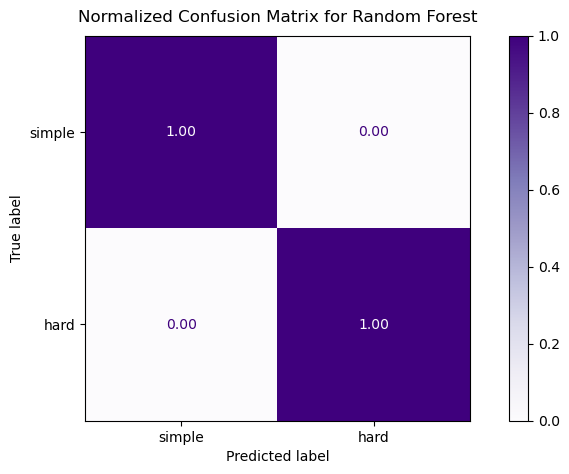

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        65
           1      1.000     1.000     1.000        54

    accuracy                          1.000       119
   macro avg      1.000     1.000     1.000       119
weighted avg      1.000     1.000     1.000       119

Area Under ROC curve = 1.0


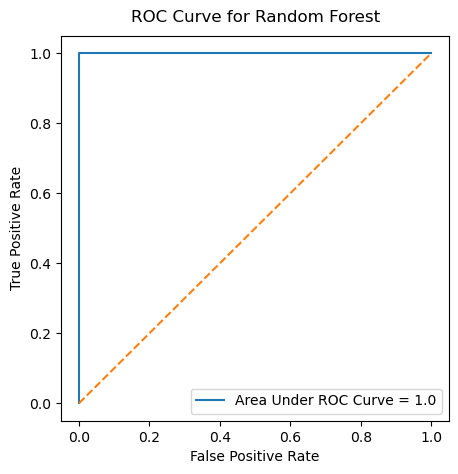

In [19]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Random Forest', y_train, y_train_pred_rf)
print(metrics.classification_report(y_train, y_train_pred_rf, digits=3))
plot_roc_auc_curve('Random Forest', rf_model, X_train_normalized, y_train)

In [20]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



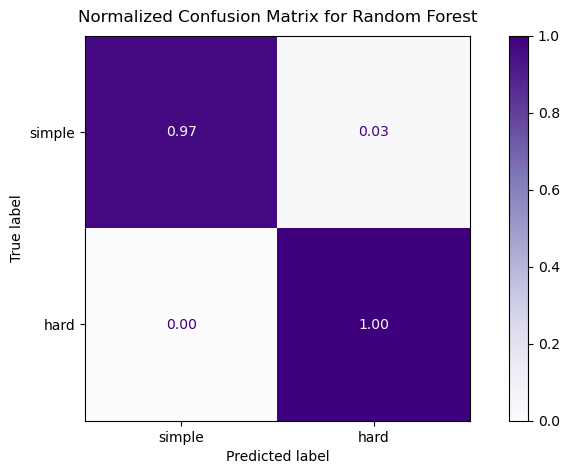

              precision    recall  f1-score   support

           0      1.000     0.966     0.982        29
           1      0.958     1.000     0.979        23

    accuracy                          0.981        52
   macro avg      0.979     0.983     0.981        52
weighted avg      0.982     0.981     0.981        52

Area Under ROC curve = 0.999


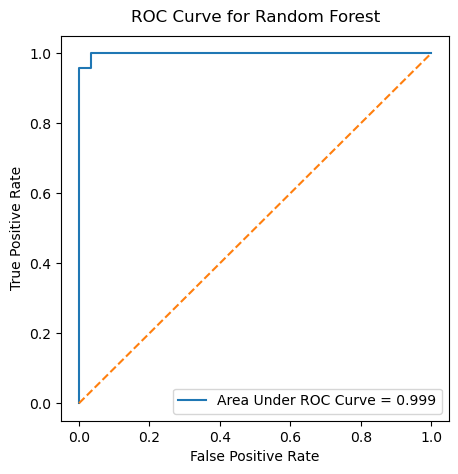

In [21]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Random Forest', y_test, y_test_pred_rf)
print(metrics.classification_report(y_test, y_test_pred_rf, digits=3))
plot_roc_auc_curve('Random Forest', rf_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for Random Forest (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

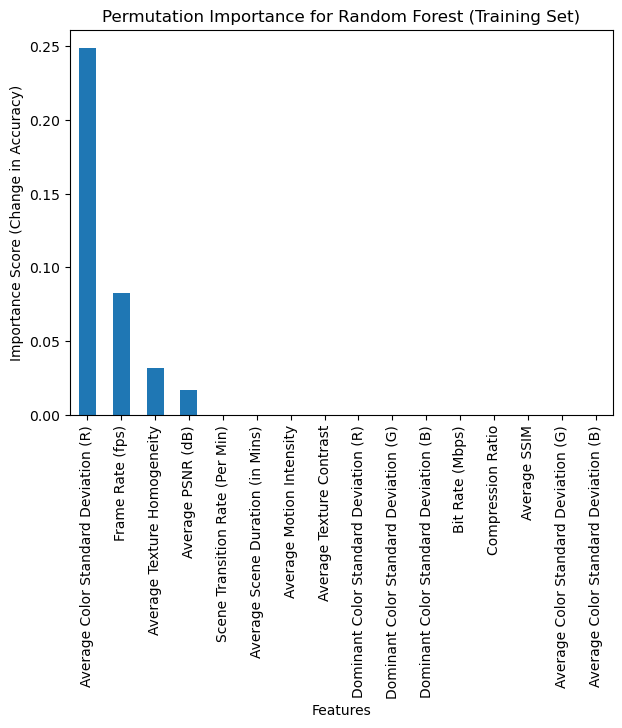

In [22]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_rf = permutation_importance(rf_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_rf = pd.Series(results_train_rf.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Random Forest (Training Set)")
importances_train_rf.plot.bar()

<Axes: title={'center': 'Permutation Importance for Random Forest (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

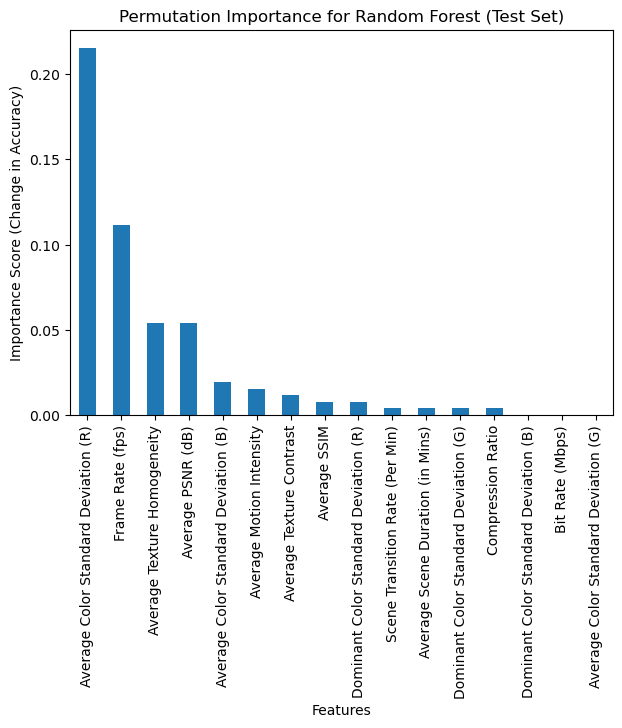

In [23]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_rf = permutation_importance(rf_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_rf = pd.Series(results_test_rf.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Random Forest (Test Set)")
importances_test_rf.plot.bar()

In [24]:
# save the trained model
rf_model_filename = 'trained_rf_model_1.pkl'

with open(rf_model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## 2. Support Vector Machine (SVM)

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [22]:
# build a support vector machine classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train which could otherwise introduce bias
pipe_svm_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm_untuned', SVC(probability=True, random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_svm_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.966
Mean Precision = 0.963
Mean Recall = 0.962
Mean F1-Score = 0.962
Mean Area Under ROC Curve = 0.991


### Model Hyperparameter Tuning using GridSearchCV 

In [23]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set which could otherwise introduce bias
pipe_svm = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(probability=True, random_state=42))
])

svm_params = [{
    'svm__C': [0.1, 1.0, 10],
    'svm__kernel': ['rbf', 'linear', 'poly'],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10]
}]

svm_tuned = GridSearchCV(pipe_svm, svm_params, cv=5, scoring='f1', verbose=10)
svm_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 1/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 2/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 3/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 4/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 1/180] START svm__C=0.1, svm__degree=2, svm__gamma=0.001, svm__kernel=rbf
[CV 5/5; 1/180] END svm__C=0.1, svm__degree=2, svm__gamma=0.001, s

[CV 5/5; 16/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5; 17/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 1/5; 17/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.818 total time=   0.0s
[CV 2/5; 17/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 2/5; 17/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.842 total time=   0.0s
[CV 3/5; 17/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 3/5; 17/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.917 total time=   0.0s
[CV 4/5; 17/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear
[CV 4/5; 17/180] END svm__C=0.1, svm__degree=3, svm__gamma=0.001, svm__kernel=linear;, score=0.720 total time=   0.0s
[CV 5/5; 17/180] START svm__C=0.1, svm__degree=3, svm__gamma=0.00

[CV 3/5; 32/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=linear;, score=0.917 total time=   0.0s
[CV 4/5; 32/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=linear
[CV 4/5; 32/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=linear;, score=0.720 total time=   0.0s
[CV 5/5; 32/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=linear
[CV 5/5; 32/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=linear;, score=0.870 total time=   0.0s
[CV 1/5; 33/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=poly
[CV 1/5; 33/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 33/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=poly
[CV 2/5; 33/180] END svm__C=0.1, svm__degree=4, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 33/180] START svm__C=0.1, svm__degree=4, svm__gamma=0.001, sv

[CV 2/5; 46/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 46/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 3/5; 46/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 46/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 4/5; 46/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 5/5; 46/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf
[CV 5/5; 46/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5; 47/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=linear
[CV 1/5; 47/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=linear;, score=0.818 total time=   0.0s
[CV 2/5; 47/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.001, svm__kernel=lin

[CV 3/5; 54/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.1, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 54/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.1, svm__kernel=poly
[CV 4/5; 54/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.1, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 54/180] START svm__C=0.1, svm__degree=5, svm__gamma=0.1, svm__kernel=poly
[CV 5/5; 54/180] END svm__C=0.1, svm__degree=5, svm__gamma=0.1, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 55/180] START svm__C=0.1, svm__degree=5, svm__gamma=1, svm__kernel=rbf.
[CV 1/5; 55/180] END svm__C=0.1, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5; 55/180] START svm__C=0.1, svm__degree=5, svm__gamma=1, svm__kernel=rbf.
[CV 2/5; 55/180] END svm__C=0.1, svm__degree=5, svm__gamma=1, svm__kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5; 55/180] START svm__C=0.1, svm__degree=5, svm__gamma=1, svm__kernel=rbf.
[CV 3/5; 55/180] END svm__C

[CV 1/5; 63/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 63/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly
[CV 2/5; 63/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 63/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly
[CV 3/5; 63/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 63/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly
[CV 4/5; 63/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 63/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly
[CV 5/5; 63/180] END svm__C=1.0, svm__degree=2, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 64/180] START svm__C=1.0, svm__degree=2, svm__gamma=0.01, svm__kernel=r

[CV 4/5; 78/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 5/5; 78/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=poly
[CV 5/5; 78/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 1/5; 79/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf
[CV 1/5; 79/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5; 79/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf
[CV 2/5; 79/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 3/5; 79/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf
[CV 3/5; 79/180] END svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 4/5; 79/180] START svm__C=1.0, svm__degree=3, svm__gamma=0.01, svm__kernel=rbf
[CV 4/5; 

[CV 2/5; 87/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly;, score=0.952 total time=   0.0s
[CV 3/5; 87/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly
[CV 3/5; 87/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly;, score=0.909 total time=   0.0s
[CV 4/5; 87/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly
[CV 4/5; 87/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly;, score=0.880 total time=   0.0s
[CV 5/5; 87/180] START svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly
[CV 5/5; 87/180] END svm__C=1.0, svm__degree=3, svm__gamma=1, svm__kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5; 88/180] START svm__C=1.0, svm__degree=3, svm__gamma=10, svm__kernel=rbf
[CV 1/5; 88/180] END svm__C=1.0, svm__degree=3, svm__gamma=10, svm__kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5; 88/180] START svm__C=1.0, svm__degree=3, svm__gamma=10, svm__kernel=rbf
[CV 2/5; 88/180] END svm__C=1.0, sv

[CV 1/5; 103/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5; 103/180] START svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 2/5; 103/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5; 103/180] START svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 3/5; 103/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5; 103/180] START svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 4/5; 103/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.952 total time=   0.0s
[CV 5/5; 103/180] START svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf
[CV 5/5; 103/180] END svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=rbf;, score=0.842 total time=   0.0s
[CV 1/5; 104/180] START svm__C=1.0, svm__degree=4, svm__gamma=10, svm__kernel=linear
[CV 1/5; 104/180] END 

[CV 4/5; 116/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5; 116/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=linear
[CV 5/5; 116/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=linear;, score=0.909 total time=   0.0s
[CV 1/5; 117/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 1/5; 117/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 117/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 2/5; 117/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=0.870 total time=   0.0s
[CV 3/5; 117/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 3/5; 117/180] END svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5; 117/180] START svm__C=1.0, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 4/5; 117/180] E

[CV 3/5; 133/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5; 133/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=rbf
[CV 4/5; 133/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.952 total time=   0.0s
[CV 5/5; 133/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=rbf
[CV 5/5; 133/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=rbf;, score=0.842 total time=   0.0s
[CV 1/5; 134/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear
[CV 1/5; 134/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5; 134/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear
[CV 2/5; 134/180] END svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5; 134/180] START svm__C=10, svm__degree=2, svm__gamma=10, svm__kernel=linear
[CV 3/5; 134/180] EN

[CV 2/5; 150/180] END svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.909 total time=   0.0s
[CV 3/5; 150/180] START svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 3/5; 150/180] END svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.909 total time=   0.0s
[CV 4/5; 150/180] START svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 4/5; 150/180] END svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.880 total time=   0.0s
[CV 5/5; 150/180] START svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly
[CV 5/5; 150/180] END svm__C=10, svm__degree=3, svm__gamma=10, svm__kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5; 151/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=rbf
[CV 1/5; 151/180] END svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=rbf;, score=0.000 total time=   0.0s
[CV 2/5; 151/180] START svm__C=10, svm__degree=4, svm__gamma=0.001, svm__kernel=rbf
[CV 2/5; 151/180] E

[CV 1/5; 159/180] END svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5; 159/180] START svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly
[CV 2/5; 159/180] END svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.909 total time=   0.0s
[CV 3/5; 159/180] START svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly
[CV 3/5; 159/180] END svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.880 total time=   0.0s
[CV 4/5; 159/180] START svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly
[CV 4/5; 159/180] END svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.815 total time=   0.0s
[CV 5/5; 159/180] START svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly
[CV 5/5; 159/180] END svm__C=10, svm__degree=4, svm__gamma=0.1, svm__kernel=poly;, score=0.800 total time=   0.0s
[CV 1/5; 160/180] START svm__C=10, svm__degree=4, svm__gamma=1, svm__kernel=rbf.
[CV 1/5; 160/180]

[CV 4/5; 167/180] END svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=linear;, score=0.957 total time=   0.0s
[CV 5/5; 167/180] START svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=linear
[CV 5/5; 167/180] END svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=linear;, score=0.909 total time=   0.0s
[CV 1/5; 168/180] START svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly
[CV 1/5; 168/180] END svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 2/5; 168/180] START svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly
[CV 2/5; 168/180] END svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 3/5; 168/180] START svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly
[CV 3/5; 168/180] END svm__C=10, svm__degree=5, svm__gamma=0.001, svm__kernel=poly;, score=0.000 total time=   0.0s
[CV 4/5; 168/180] START svm__C=10, svm__degree=5, svm__gamma=0.001, svm__k

[CV 4/5; 176/180] END svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=linear;, score=0.957 total time=   0.0s
[CV 5/5; 176/180] START svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=linear
[CV 5/5; 176/180] END svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=linear;, score=0.909 total time=   0.0s
[CV 1/5; 177/180] START svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 1/5; 177/180] END svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5; 177/180] START svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 2/5; 177/180] END svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=0.870 total time=   0.0s
[CV 3/5; 177/180] START svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 3/5; 177/180] END svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly;, score=0.857 total time=   0.0s
[CV 4/5; 177/180] START svm__C=10, svm__degree=5, svm__gamma=1, svm__kernel=poly
[CV 4/5; 177/180] END svm__C=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid=[{'svm__C': [0.1, 1.0, 10], 'svm__degree': [2, 3, 4, 5],
                          'svm__gamma': [0.001, 0.01, 0.1, 1, 10],
                          'svm__kernel': ['rbf', 'linear', 'poly']}],
             scoring='f1', verbose=10)

In [24]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_svm = svm_tuned.best_params_
best_mean_f1_svm = svm_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_svm}")
print(f"Best Mean F1-Score = {best_mean_f1_svm}")

Best Hyperparameters = {'svm__C': 1.0, 'svm__degree': 2, 'svm__gamma': 1, 'svm__kernel': 'poly'}
Best Mean F1-Score = 0.9722567287784679


### Model Training and Evaluation After Hyperparameter Tuning

In [25]:
# train the model using the best hyperparameters and normalized input features
best_parameters_svm = {'C': 1.0, 
                       'degree': 2, 
                       'gamma': 1, 
                       'kernel': 'poly'}

svm_model = SVC(**best_parameters_svm, probability=True, random_state=42)
svm_model.fit(X_train_normalized, y_train)

SVC(degree=2, gamma=1, kernel='poly', probability=True, random_state=42)

In [26]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_svm = svm_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



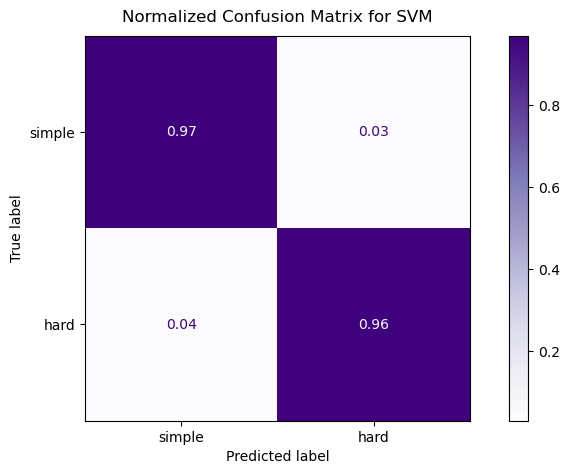

              precision    recall  f1-score   support

           0      0.969     0.969     0.969        65
           1      0.963     0.963     0.963        54

    accuracy                          0.966       119
   macro avg      0.966     0.966     0.966       119
weighted avg      0.966     0.966     0.966       119

Area Under ROC curve = 0.998


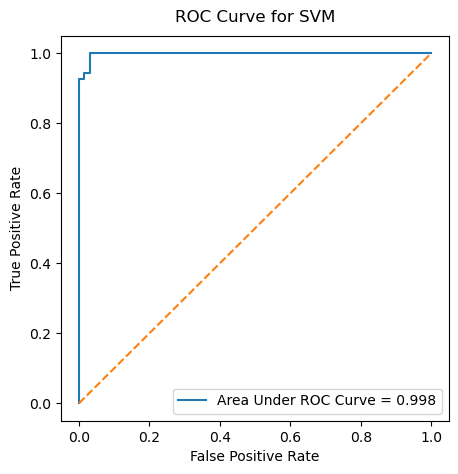

In [27]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('SVM', y_train, y_train_pred_svm)
print(metrics.classification_report(y_train, y_train_pred_svm, digits=3))
plot_roc_auc_curve('SVM', svm_model, X_train_normalized, y_train)

In [28]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



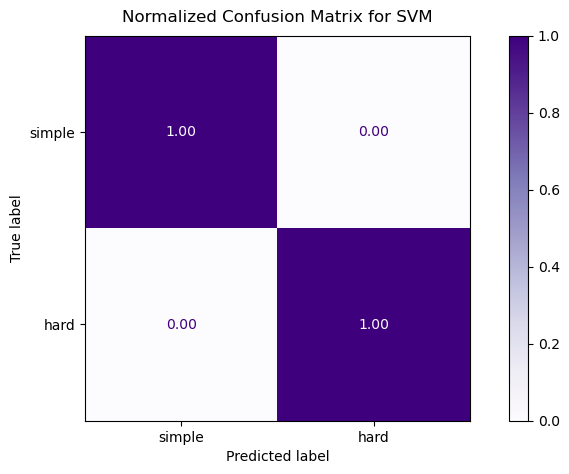

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        29
           1      1.000     1.000     1.000        23

    accuracy                          1.000        52
   macro avg      1.000     1.000     1.000        52
weighted avg      1.000     1.000     1.000        52

Area Under ROC curve = 1.0


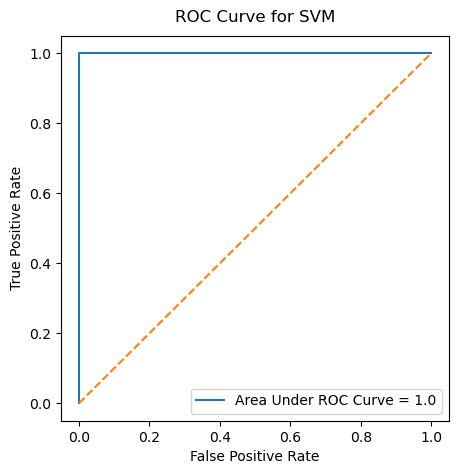

In [29]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('SVM', y_test, y_test_pred_svm)
print(metrics.classification_report(y_test, y_test_pred_svm, digits=3))
plot_roc_auc_curve('SVM', svm_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for SVM (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

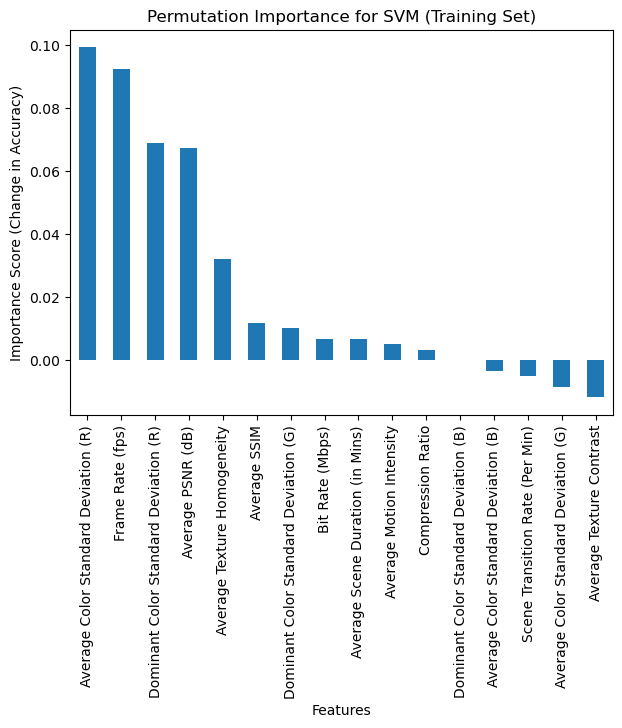

In [30]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_svm = permutation_importance(svm_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_svm = pd.Series(results_train_svm.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for SVM (Training Set)")
importances_train_svm.plot.bar()

<Axes: title={'center': 'Permutation Importance for SVM (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

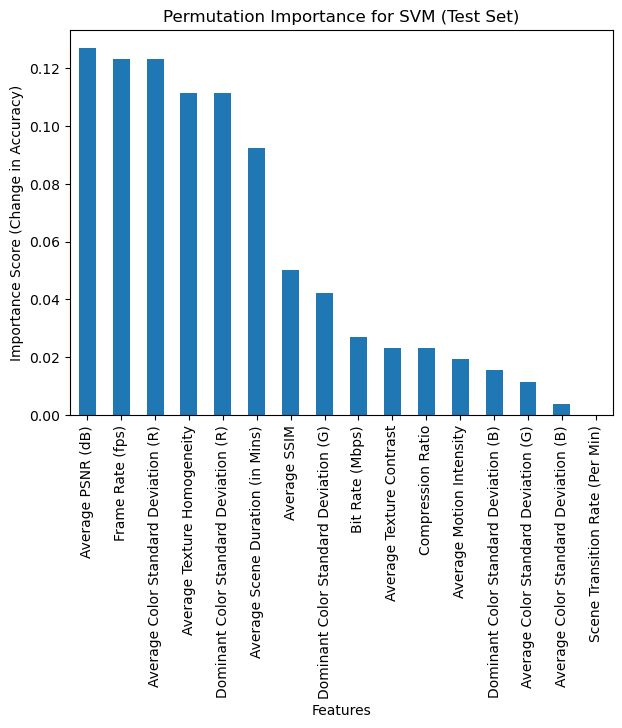

In [31]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_svm = permutation_importance(svm_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_svm = pd.Series(results_test_svm.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for SVM (Test Set)")
importances_test_svm.plot.bar()

In [32]:
# save the trained model
svm_model_filename = 'trained_svm_model_1.pkl'

with open(svm_model_filename, 'wb') as file:
    pickle.dump(svm_model, file)

## 3. Logistic Regression

### Model Evaluation Before Hyperparameter Tuning using Cross Validation

In [32]:
# build a logistic regression classifier using the default parameters
# train and validate the model's performance on different subsets of training data by performing stratified 5-fold cross validation
# as our dataset is small, cross validation is used to ensure the performance of the model is not dependent on a particular data split and that it can generalize well to unseen data
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max scaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set when normalizing which could otherwise introduce bias
pipe_lr_untuned = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_untuned', LogisticRegression(random_state=42))
])

print(f"Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:\n")
cross_validation(pipe_lr_untuned, X_train, y_train, 5)

Model Evaluation Before Hyperparameter Tuning using Stratified 5-Fold Cross Validation:

Mean Accuracy = 0.924
Mean Precision = 0.93
Mean Recall = 0.909
Mean F1-Score = 0.915
Mean Area Under ROC Curve = 0.98


### Model Hyperparameter Tuning using GridSearchCV 

In [33]:
# perform hyperparamter tuning using GridSearchCV with stratified 5-fold cross validation to evaluate the performance of each combination of hyperparameters using f1-score metric
# stratified cross validation ensures the class ratio in train and validation sets are similar which is important for imbalanced dataset

# pipeline is created to apply min max sccaling on the input features after splitting the training set into train and validation sets during cross validation
# this ensures that there is no influence of the validation set on the train set when normalizing which could otherwise introduce bias
pipe_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr', LogisticRegression(random_state=42))
])

lr_params = [
    {'lr__penalty':['l2'],
     'lr__solver':['lbfgs', 'newton-cg', 'sag'],
     'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
     'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
    
     {'lr__penalty':['l1', 'l2'],
      'lr__solver':['liblinear'],
      'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
      'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
    
     {'lr__penalty':['l1', 'l2', 'elasticnet'],
      'lr__solver':['saga'],
      'lr__C':[0.001, 0.01, 0.1, 1.0, 10],
      'lr__max_iter':[100, 500, 1000, 2500, 5000, 6000]},
]

lr_tuned = GridSearchCV(pipe_lr, lr_params, cv=5, scoring='f1', verbose=10)
lr_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 2/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 3/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 4/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 1/240] END lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 5/5; 1/240] START lr__C=0.001, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 1/240] END lr__C=0.001, lr__m

[CV 3/5; 9/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 4/5; 9/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag
[CV 4/5; 9/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 5/5; 9/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag
[CV 5/5; 9/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 1/5; 10/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 1/5; 10/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 2/5; 10/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs
[CV 2/5; 10/240] END lr__C=0.001, lr__max_iter=2500, lr__penalty=l2, lr__solver=lbfgs;, score=0.000 total time=   0.0s
[CV 3/5; 10/240] START lr__C=0.001, lr__max_iter=2500, lr__penalty=l

[CV 3/5; 17/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 4/5; 17/240] START lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 17/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 5/5; 17/240] START lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 17/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/5; 18/240] START lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 1/5; 18/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 2/5; 18/240] START lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag
[CV 2/5; 18/240] END lr__C=0.001, lr__max_iter=6000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 3/5; 18/240] START lr__C=0.001, lr__m

[CV 3/5; 32/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 4/5; 32/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 32/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 5/5; 32/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 32/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.000 total time=   0.0s
[CV 1/5; 33/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=sag
[CV 1/5; 33/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 2/5; 33/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=sag
[CV 2/5; 33/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=sag;, score=0.000 total time=   0.0s
[CV 3/5; 33/240] START lr__C=0.01, lr__max_iter=50

[CV 1/5; 41/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.900 total time=   0.0s
[CV 2/5; 41/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 41/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.778 total time=   0.0s
[CV 3/5; 41/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 3/5; 41/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.857 total time=   0.0s
[CV 4/5; 41/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 41/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5; 41/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 41/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.778 total time=   0.0s
[CV 1/5; 42/240] START lr__C=0.1, lr__max_it

[CV 1/5; 50/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.900 total time=   0.0s
[CV 2/5; 50/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 50/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.778 total time=   0.0s
[CV 3/5; 50/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 3/5; 50/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.857 total time=   0.0s
[CV 4/5; 50/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 50/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.667 total time=   0.0s
[CV 5/5; 50/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 50/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l2, lr__solver=newton-cg;, score=0.778 total time=   0.0s
[CV 1/5; 51/240] START lr__C=0.1, l

[CV 3/5; 58/240] END lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs;, score=0.957 total time=   0.0s
[CV 4/5; 58/240] START lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 58/240] END lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs;, score=0.857 total time=   0.0s
[CV 5/5; 58/240] START lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 58/240] END lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=lbfgs;, score=0.909 total time=   0.0s
[CV 1/5; 59/240] START lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 1/5; 59/240] END lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.900 total time=   0.0s
[CV 2/5; 59/240] START lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 59/240] END lr__C=1.0, lr__max_iter=500, lr__penalty=l2, lr__solver=newton-cg;, score=0.952 total time=   0.0s
[CV 3/5; 59/240] START lr__C=1.0, lr__max_iter=500, lr__penalty=

[CV 3/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.957 total time=   0.0s
[CV 4/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 4/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.957 total time=   0.0s
[CV 5/5; 73/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs
[CV 5/5; 73/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=lbfgs;, score=0.909 total time=   0.0s
[CV 1/5; 74/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 1/5; 74/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.952 total time=   0.0s
[CV 2/5; 74/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg
[CV 2/5; 74/240] END lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__solver=newton-cg;, score=0.900 total time=   0.0s
[CV 3/5; 74/240] START lr__C=10, lr__max_iter=100, lr__penalty=l2, lr__so

[CV 3/5; 83/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.957 total time=   0.0s
[CV 4/5; 83/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 4/5; 83/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.957 total time=   0.0s
[CV 5/5; 83/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg
[CV 5/5; 83/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=newton-cg;, score=0.909 total time=   0.0s
[CV 1/5; 84/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 1/5; 84/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.952 total time=   0.0s
[CV 2/5; 84/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag
[CV 2/5; 84/240] END lr__C=10, lr__max_iter=2500, lr__penalty=l2, lr__solver=sag;, score=0.900 total time=   0.0s
[CV 3/5; 84/240] START lr__C=10, lr__max_iter=2500, lr__penalty=l2, 

[CV 4/5; 99/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 99/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear
[CV 5/5; 99/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 1/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 1/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 2/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 100/240] START lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 3/5; 100/240] END lr__C=0.001, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5; 10

[CV 1/5; 112/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.706 total time=   0.0s
[CV 2/5; 112/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 2/5; 112/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.429 total time=   0.0s
[CV 3/5; 112/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 3/5; 112/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.308 total time=   0.0s
[CV 4/5; 112/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 4/5; 112/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 112/240] START lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear
[CV 5/5; 112/240] END lr__C=0.01, lr__max_iter=5000, lr__penalty=l2, lr__solver=liblinear;, score=0.333 total time=   0.0s
[CV 1/5; 113/240]

[CV 5/5; 122/240] END lr__C=0.1, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.857 total time=   0.0s
[CV 1/5; 123/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear
[CV 1/5; 123/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 2/5; 123/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear
[CV 2/5; 123/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 3/5; 123/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear
[CV 3/5; 123/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 4/5; 123/240] START lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear
[CV 4/5; 123/240] END lr__C=0.1, lr__max_iter=5000, lr__penalty=l1, lr__solver=liblinear;, score=0.000 total time=   0.0s
[CV 5/5; 123/240] START lr

[CV 1/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.900 total time=   0.0s
[CV 2/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 2/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.952 total time=   0.0s
[CV 3/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 3/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.957 total time=   0.0s
[CV 4/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 4/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.783 total time=   0.0s
[CV 5/5; 134/240] START lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear
[CV 5/5; 134/240] END lr__C=1.0, lr__max_iter=2500, lr__penalty=l2, lr__solver=liblinear;, score=0.870 total time=   0.0s
[CV 1/5; 135/240] START lr

[CV 1/5; 143/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=0.952 total time=   0.0s
[CV 2/5; 143/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear
[CV 2/5; 143/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=0.900 total time=   0.0s
[CV 3/5; 143/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear
[CV 3/5; 143/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=0.957 total time=   0.0s
[CV 4/5; 143/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear
[CV 4/5; 143/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=0.917 total time=   0.0s
[CV 5/5; 143/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear
[CV 5/5; 143/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=0.909 total time=   0.0s
[CV 1/5; 144/240] START lr__C=10, l

[CV 3/5; 158/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 4/5; 158/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 4/5; 158/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 5/5; 158/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 5/5; 158/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 159/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 159/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 159/240] START lr__C=0.001, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 159/240] END lr__C=0.001, lr__max_iter=1000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 159/240] START l

[CV 3/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 4/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 4/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 5/5; 170/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga
[CV 5/5; 170/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 171/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 171/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 171/240] START lr__C=0.01, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga
[CV 2/5; 171/240] END lr__C=0.01, lr__max_iter=100, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 3/5; 171/240] START lr__C=0.01, lr__max

[CV 4/5; 178/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.629 total time=   0.0s
[CV 5/5; 178/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga
[CV 5/5; 178/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 1/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 2/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 2/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 3/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga
[CV 3/5; 179/240] END lr__C=0.01, lr__max_iter=2500, lr__penalty=l2, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 4/5; 179/240] START lr__C=0.01, lr__max_iter=2500, lr__pen

[CV 5/5; 190/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l1, lr__solver=saga;, score=0.000 total time=   0.0s
[CV 1/5; 191/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga
[CV 1/5; 191/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga;, score=0.900 total time=   0.0s
[CV 2/5; 191/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga
[CV 2/5; 191/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga;, score=0.778 total time=   0.0s
[CV 3/5; 191/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga
[CV 3/5; 191/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 4/5; 191/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga
[CV 4/5; 191/240] END lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=saga;, score=0.667 total time=   0.0s
[CV 5/5; 191/240] START lr__C=0.1, lr__max_iter=500, lr__penalty=l2, lr__solver=

[CV 2/5; 203/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.778 total time=   0.0s
[CV 3/5; 203/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 3/5; 203/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 4/5; 203/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 4/5; 203/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.667 total time=   0.0s
[CV 5/5; 203/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 5/5; 203/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.778 total time=   0.0s
[CV 1/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga
[CV 1/5; 204/240] END lr__C=0.1, lr__max_iter=6000, lr__penalty=elasticnet, lr__solver=saga;, score=nan total time=   0.0s
[CV 2/5; 204/240] START lr__C=0.1, lr__max_iter=6000, lr_

[CV 3/5; 211/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga;, score=0.917 total time=   0.0s
[CV 4/5; 211/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga
[CV 4/5; 211/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 5/5; 211/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga
[CV 5/5; 211/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 1/5; 212/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 1/5; 212/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.900 total time=   0.0s
[CV 2/5; 212/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 2/5; 212/240] END lr__C=1.0, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.952 total time=   0.0s
[CV 3/5; 212/240] START lr__C=1.0, lr__max_iter=1000, lr__penalty=l2, l

[CV 1/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.900 total time=   0.0s
[CV 2/5; 221/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 2/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.952 total time=   0.0s
[CV 3/5; 221/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 3/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.957 total time=   0.0s
[CV 4/5; 221/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 4/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 5/5; 221/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 5/5; 221/240] END lr__C=1.0, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.909 total time=   0.0s
[CV 1/5; 222/240] START lr__C=1.0, lr__max_iter=6000, lr__penalty=elast

[CV 5/5; 229/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l1, lr__solver=saga;, score=0.909 total time=   0.0s
[CV 1/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 1/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.952 total time=   0.0s
[CV 2/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 2/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.900 total time=   0.0s
[CV 3/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 3/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.957 total time=   0.0s
[CV 4/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga
[CV 4/5; 230/240] END lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=saga;, score=0.957 total time=   0.0s
[CV 5/5; 230/240] START lr__C=10, lr__max_iter=1000, lr__penalty=l2, lr__solver=

[CV 2/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.900 total time=   0.0s
[CV 3/5; 238/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga
[CV 3/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.957 total time=   0.0s
[CV 4/5; 238/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga
[CV 4/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.957 total time=   0.0s
[CV 5/5; 238/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga
[CV 5/5; 238/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l1, lr__solver=saga;, score=0.857 total time=   0.0s
[CV 1/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga
[CV 1/5; 239/240] END lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=saga;, score=0.952 total time=   0.0s
[CV 2/5; 239/240] START lr__C=10, lr__max_iter=6000, lr__penalty=l2, lr__solver=

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('lr',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l2'],
                          'lr__solver': ['lbfgs', 'newton-cg', 'sag']},
                         {'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l1', 'l2'],
                          'lr__solver': ['liblinear']},
                         {'lr__C': [0.001, 0.01, 0.1, 1.0, 10],
                          'lr__max_iter': [100, 500, 1000, 2500, 5000, 6000],
                          'lr__penalty': ['l1', 'l2', 'elasticnet'],
                          'lr__solver': ['saga']}],
             scoring='f1', verbose=10)

In [34]:
# get the best hyperparameters and the best mean cross-validated f1-score
best_parameters_lr = lr_tuned.best_params_
best_mean_f1_lr = lr_tuned.best_score_
print(f"Best Hyperparameters = {best_parameters_lr}")
print(f"Best Mean F1-Score = {best_mean_f1_lr}")

Best Hyperparameters = {'lr__C': 10, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Mean F1-Score = 0.9453792584227367


### Model Training and Evaluation After Hyperparameter Tuning

In [33]:
# train the model using the best hyperparameters and normalized input features
best_parameters_lr = {'C': 10, 
                      'max_iter': 100, 
                      'penalty': 'l2', 
                      'solver': 'liblinear'}

lr_model = LogisticRegression(**best_parameters_lr, random_state=42)
lr_model.fit(X_train_normalized, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [34]:
# use the trained and fine-tuned model to make predictions on the training set
y_train_pred_lr = lr_model.predict(X_train_normalized)

Model Evaluation on Training Set After Hyperparameter Tuning:



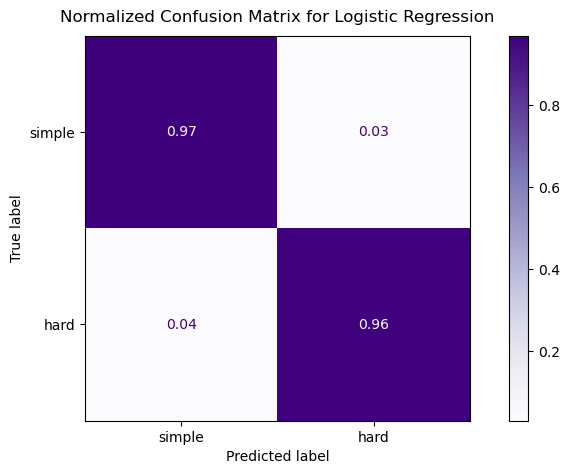

              precision    recall  f1-score   support

           0      0.969     0.969     0.969        65
           1      0.963     0.963     0.963        54

    accuracy                          0.966       119
   macro avg      0.966     0.966     0.966       119
weighted avg      0.966     0.966     0.966       119

Area Under ROC curve = 0.993


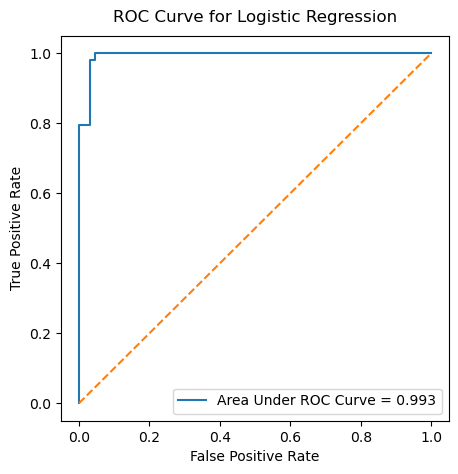

In [35]:
# evaluate the performance of the model on training set
print(f"Model Evaluation on Training Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Logistic Regression', y_train, y_train_pred_lr)
print(metrics.classification_report(y_train, y_train_pred_lr, digits=3))
plot_roc_auc_curve('Logistic Regression', lr_model, X_train_normalized, y_train)

In [36]:
# use the trained and fine-tuned model to make predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_normalized)

Model Evaluation on Test Set After Hyperparameter Tuning:



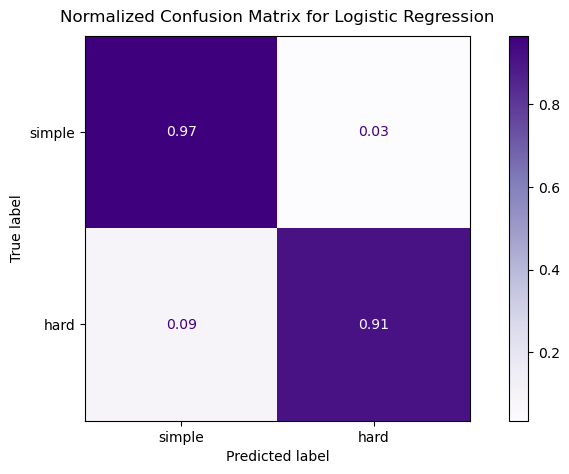

              precision    recall  f1-score   support

           0      0.933     0.966     0.949        29
           1      0.955     0.913     0.933        23

    accuracy                          0.942        52
   macro avg      0.944     0.939     0.941        52
weighted avg      0.943     0.942     0.942        52

Area Under ROC curve = 0.988


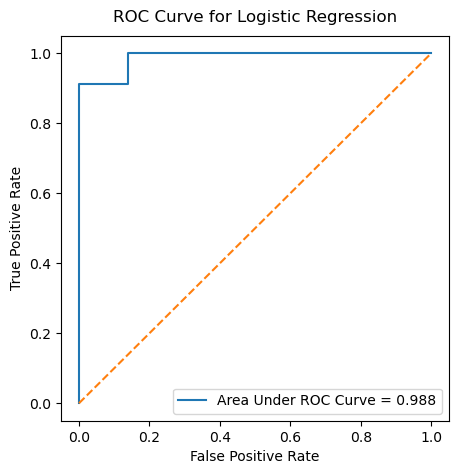

In [37]:
# evaluate the performance of the model on test set
print(f"Model Evaluation on Test Set After Hyperparameter Tuning:\n")
plot_norm_confusion_matrix('Logistic Regression', y_test, y_test_pred_lr)
print(metrics.classification_report(y_test, y_test_pred_lr, digits=3))
plot_roc_auc_curve('Logistic Regression', lr_model, X_test_normalized, y_test)

<Axes: title={'center': 'Permutation Importance for Logistic Regression (Training Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

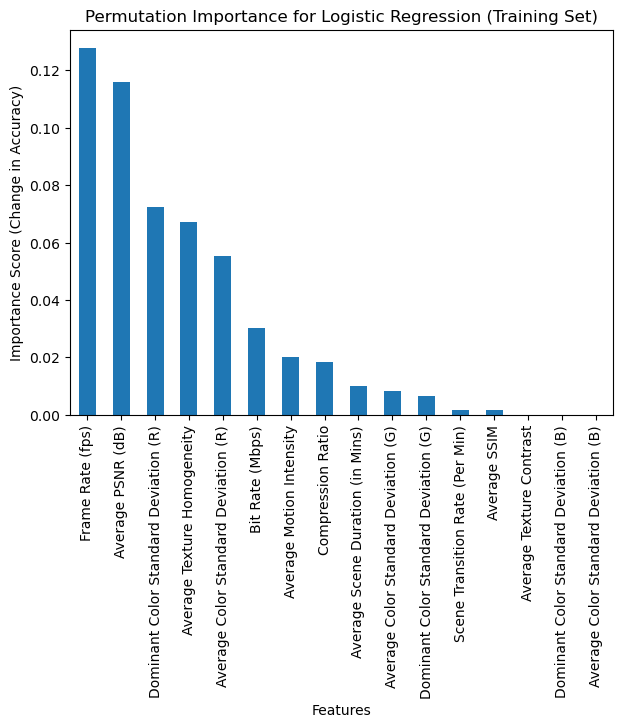

In [38]:
# check which features contributed most in making the predictions on the training set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_train_lr = permutation_importance(lr_model, X_train_normalized, y_train, n_repeats=5, scoring='accuracy', random_state=42)
importances_train_lr = pd.Series(results_train_lr.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Logistic Regression (Training Set)")
importances_train_lr.plot.bar()

<Axes: title={'center': 'Permutation Importance for Logistic Regression (Test Set)'}, xlabel='Features', ylabel='Importance Score (Change in Accuracy)'>

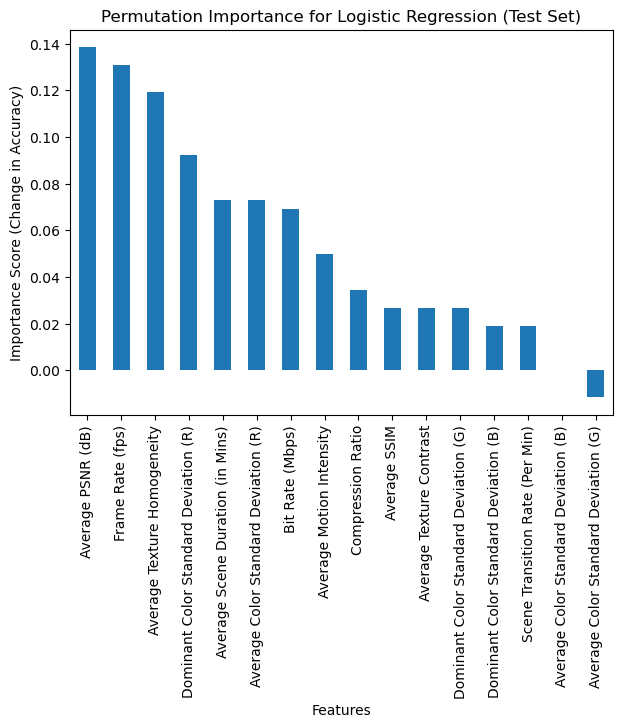

In [39]:
# check which features contributed most in making the predictions on the test set by computing the permutation importance
# permutation importance score measures the decrease in model performance when a feature's values are randomly shuffled or permuted
# high permutation importance score --> high change in the scoring metric used (e.g. accuracy) --> important feature
results_test_lr = permutation_importance(lr_model, X_test_normalized, y_test, n_repeats=5, scoring='accuracy', random_state=42)
importances_test_lr = pd.Series(results_test_lr.importances_mean, index=X.columns).sort_values(ascending=False)

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.xlabel('Features')
plt.ylabel('Importance Score (Change in Accuracy)')
plt.title("Permutation Importance for Logistic Regression (Test Set)")
importances_test_lr.plot.bar()

In [40]:
# save the trained model
lr_model_filename = 'trained_lr_model_1.pkl'

with open(lr_model_filename, 'wb') as file:
    pickle.dump(lr_model, file)